In [ ]:
!pip install catboost

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


/usr/local/lib/python3.11/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [6]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [7]:
data_1 = pd.read_csv("/content/drive/MyDrive/Colab_/DataSets/Java-24DataSet/all_features_with_DS_64.csv", sep=',')

In [8]:
data_6 = pd.read_csv("/content/drive/MyDrive/Colab_/DataSets/Java-24DataSet/all_features_with_DS_512.csv", sep=',')

In [9]:
data_5 = pd.read_csv("/content/drive/MyDrive/Colab_/DataSets/Java-24DataSet/all_features_with_DS_350.csv", sep=',')

In [10]:
data_4 = pd.read_csv("/content/drive/MyDrive/Colab_/DataSets/Java-24DataSet/all_features_with_DS_300.csv", sep=',')

In [11]:
data_2 = pd.read_csv("/content/drive/MyDrive/Colab_/DataSets/Java-24DataSet/all_features_with_DS_128.csv", sep=',')

In [12]:
data_3 = pd.read_csv("/content/drive/MyDrive/Colab_/DataSets/Java-24DataSet/all_features_with_DS_256.csv", sep=',')

In [13]:
data_1

,Path,File,Pattern,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,...,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Feature_58,Feature_59,Feature_60,Feature_61,Feature_62
0,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_Application.java,AbstractFactory,-0.097275,0.222243,0.064261,0.382172,-0.008921,0.121648,0.250802,...,-0.352197,0.291249,-0.121717,0.505769,-0.004727,0.126213,-0.268319,0.327934,-0.011253,-0.318510
1,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_Button.java,AbstractFactory,-0.109432,0.310412,0.187801,0.395957,0.058061,0.162090,-0.014812,...,-0.351405,0.317284,-0.010506,0.466435,0.104314,0.153731,-0.428465,0.259708,-0.106922,-0.050787
2,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_Checkbox.java,AbstractFactory,0.032466,0.147208,-0.090366,0.437368,0.110509,0.140746,0.238188,...,-0.235184,0.291148,-0.198831,0.500036,0.042369,-0.054946,-0.445396,0.201325,-0.097554,-0.236204
3,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_GUIFactory.java,AbstractFactory,-0.050978,0.113966,0.034533,0.302714,0.001293,0.179818,0.027159,...,-0.376197,0.369959,-0.198812,0.517059,0.188372,0.215386,-0.444761,0.303187,-0.119069,-0.232068
4,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_MacOSButton.java,AbstractFactory,-0.119144,0.132565,-0.094980,0.523353,-0.061683,0.263691,0.098011,...,-0.237348,0.215147,-0.141952,0.576317,0.036910,0.349646,-0.401033,-0.080825,0.079093,-0.120545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3409,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_ClasseVisitor.java,Visitor,-0.228638,-0.144070,-0.035188,0.196183,-0.147230,-0.015837,-0.024394,...,-0.337828,0.418863,0.147777,0.138902,-0.188097,0.338992,-0.266413,0.173498,0.114719,0.073008
3410,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_Guerreiro.java,Visitor,-0.221755,0.097701,-0.040012,0.236514,-0.186489,0.010469,-0.096839,...,-0.168870,0.437204,0.132561,0.231977,-0.237875,0.374342,-0.279783,0.272931,0.258035,-0.037505
3411,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_Mago.java,Visitor,-0.232932,0.152850,-0.070101,0.246196,-0.170926,0.002154,-0.118509,...,-0.168146,0.429981,0.111461,0.229536,-0.195520,0.354805,-0.242146,0.248950,0.209362,-0.050734
3412,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_Visitor.java,Visitor,-0.407051,0.753603,-0.062448,0.379923,-0.061971,0.106103,0.129572,...,-0.020989,0.429227,0.119993,0.254957,-0.667721,0.506901,-0.101489,-0.113763,0.359213,-0.051202


In [14]:
data_2

,Path,File,Pattern,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,...,Feature_118,Feature_119,Feature_120,Feature_121,Feature_122,Feature_123,Feature_124,Feature_125,Feature_126,Feature_127
0,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_Application.java,AbstractFactory,-0.105768,0.325620,0.205610,0.397575,0.052537,0.162047,-0.015857,...,-0.235156,-0.132107,0.384927,-0.064046,-0.100868,0.127862,0.244187,0.036257,0.444572,0.364887
1,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_Button.java,AbstractFactory,-0.103390,0.235098,0.076066,0.391599,0.000424,0.135305,0.243828,...,-0.314363,0.035894,0.294633,0.025059,-0.249493,-0.024244,0.400655,0.152910,0.452349,0.355039
2,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_Checkbox.java,AbstractFactory,0.032466,0.147208,-0.090366,0.437368,0.110509,0.140746,0.238188,...,-0.424480,0.224841,0.358610,-0.064388,-0.308876,0.076572,0.167788,0.143956,0.356476,0.425899
3,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_GUIFactory.java,AbstractFactory,-0.050978,0.113966,0.034533,0.302714,0.001293,0.179818,0.027159,...,-0.348977,0.015294,0.582168,0.022255,-0.266372,-0.084595,0.316989,0.076227,0.470877,0.335508
4,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_MacOSButton.java,AbstractFactory,-0.119144,0.132565,-0.094980,0.523353,-0.061683,0.263691,0.098011,...,-0.334693,0.054849,0.376741,-0.017960,-0.174766,0.029399,0.439647,0.000143,0.323209,0.480926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3409,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_ClasseVisitor.java,Visitor,-0.232601,-0.152321,-0.029575,0.207237,-0.133703,-0.003560,-0.020689,...,-0.180191,0.069929,0.712098,-0.296273,-0.143875,0.148498,0.364211,-0.591290,0.242788,0.157382
3410,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_Guerreiro.java,Visitor,-0.215814,0.052584,-0.023726,0.221309,-0.185714,0.015631,-0.110644,...,-0.230668,0.040877,0.635147,-0.398852,-0.029862,0.186457,0.404135,-0.478707,0.336382,0.287049
3411,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_Mago.java,Visitor,-0.227396,0.174004,-0.075799,0.242826,-0.165549,-0.003321,-0.112976,...,-0.294558,0.038866,0.621943,-0.429666,-0.017385,0.161960,0.433911,-0.492046,0.336323,0.250505
3412,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_Visitor.java,Visitor,-0.410874,0.761023,-0.066331,0.381045,-0.067286,0.100635,0.129036,...,-0.280409,0.329463,0.408063,-0.673995,-0.023647,0.307769,0.229246,-0.606974,0.226226,0.145387


In [15]:
data_3

,Path,File,Pattern,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,...,Feature_246,Feature_247,Feature_248,Feature_249,Feature_250,Feature_251,Feature_252,Feature_253,Feature_254,Feature_255
0,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_Application.java,AbstractFactory,0.032466,0.147208,-0.090366,0.437368,0.110509,0.140746,0.238188,...,-0.210209,-0.442250,-0.123119,0.699756,0.030286,-0.089884,-0.097430,-0.008400,-0.243104,-0.144529
1,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_Button.java,AbstractFactory,-0.099016,0.241810,0.055299,0.396759,-0.011325,0.130784,0.244424,...,-0.382561,-0.495962,-0.045375,0.552869,0.034259,0.017221,-0.113493,0.054947,-0.193424,-0.344170
2,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_Checkbox.java,AbstractFactory,-0.121502,0.340283,0.185854,0.374923,0.066176,0.165358,-0.010913,...,-0.316610,-0.219040,0.175687,0.353283,0.132121,-0.327522,-0.046738,0.114365,-0.130963,-0.441102
3,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_GUIFactory.java,AbstractFactory,-0.051527,0.106273,0.040432,0.305567,-0.002598,0.177275,0.028252,...,-0.322359,-0.471335,0.086592,0.497523,0.085271,-0.010981,-0.196977,0.127559,-0.194090,-0.290674
4,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_MacOSButton.java,AbstractFactory,-0.120412,0.127997,-0.088603,0.528329,-0.066239,0.259915,0.119924,...,-0.213594,-0.401882,0.015273,0.616690,0.053647,-0.135384,0.105614,-0.013028,-0.201808,-0.211899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3409,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_ClasseVisitor.java,Visitor,-0.228638,-0.144070,-0.035188,0.196183,-0.147230,-0.015837,-0.024394,...,-0.222380,-0.177198,-0.326417,0.361830,0.247750,0.158229,-0.061165,-0.075973,-0.254102,-0.243353
3410,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_Guerreiro.java,Visitor,-0.221755,0.097701,-0.040012,0.236514,-0.186489,0.010469,-0.096839,...,-0.231961,-0.146560,-0.279437,0.348205,0.208194,0.020019,-0.053640,-0.225268,-0.308834,-0.249705
3411,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_Mago.java,Visitor,-0.232932,0.152850,-0.070101,0.246196,-0.170926,0.002154,-0.118509,...,-0.236262,-0.106328,-0.295276,0.339169,0.199997,0.015421,-0.074151,-0.236031,-0.266760,-0.314383
3412,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_Visitor.java,Visitor,-0.407051,0.753603,-0.062448,0.379923,-0.061971,0.106103,0.129572,...,-0.092757,-0.455019,-0.136629,-0.026581,0.200543,-0.264917,-0.201171,-0.034990,0.356777,-0.527484


In [16]:
data_4

,Path,File,Pattern,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,...,Feature_290,Feature_291,Feature_292,Feature_293,Feature_294,Feature_295,Feature_296,Feature_297,Feature_298,Feature_299
0,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_Application.java,AbstractFactory,0.032466,0.147208,-0.090366,0.437368,0.110509,0.140746,0.238188,...,-0.112165,0.120741,0.126840,-0.155332,0.055117,-0.251955,-0.480609,0.077188,-0.052161,0.013700
1,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_Button.java,AbstractFactory,-0.099016,0.241810,0.055299,0.396759,-0.011325,0.130784,0.244424,...,-0.105644,0.217719,0.079674,-0.117851,-0.025278,-0.063794,-0.533796,0.073730,-0.099470,0.108174
2,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_Checkbox.java,AbstractFactory,-0.121502,0.340283,0.185854,0.374923,0.066176,0.165358,-0.010913,...,-0.239168,0.162942,-0.042525,-0.306764,0.151921,-0.108332,-0.659302,-0.007647,0.099525,-0.038384
3,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_GUIFactory.java,AbstractFactory,-0.120412,0.127997,-0.088603,0.528329,-0.066239,0.259915,0.119924,...,-0.028564,0.154817,0.017553,-0.031352,0.061554,-0.074309,-0.154051,-0.033881,-0.046146,0.217192
4,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_MacOSButton.java,AbstractFactory,-0.051527,0.106273,0.040432,0.305567,-0.002598,0.177275,0.028252,...,-0.193903,0.318920,0.128356,-0.239447,0.091089,-0.198190,-0.678390,0.028100,0.068247,-0.002929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3409,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_ClasseVisitor.java,Visitor,-0.228638,-0.144070,-0.035188,0.196183,-0.147230,-0.015837,-0.024394,...,0.387313,0.081685,-0.078120,-0.108364,-0.007182,-0.095810,-0.318840,-0.221278,-0.288705,0.103910
3410,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_Guerreiro.java,Visitor,-0.221755,0.097701,-0.040012,0.236514,-0.186489,0.010469,-0.096839,...,0.341135,0.113800,-0.088075,-0.037045,-0.090144,-0.010213,-0.336755,-0.098393,-0.121073,0.134686
3411,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_Mago.java,Visitor,-0.232932,0.152850,-0.070101,0.246196,-0.170926,0.002154,-0.118509,...,0.353948,0.143654,-0.087738,0.003197,-0.093505,-0.011284,-0.358076,-0.081418,-0.120058,0.112784
3412,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_Visitor.java,Visitor,-0.407051,0.753603,-0.062448,0.379923,-0.061971,0.106103,0.129572,...,-0.248454,-0.449324,0.338595,-0.072829,0.265368,-0.072909,-0.506559,0.064482,-0.283891,-0.105414


In [17]:
data_5

,Path,File,Pattern,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,...,Feature_340,Feature_341,Feature_342,Feature_343,Feature_344,Feature_345,Feature_346,Feature_347,Feature_348,Feature_349
0,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_Application.java,AbstractFactory,-0.098221,0.249422,0.059398,0.385766,-0.006394,0.130771,0.249948,...,-0.316872,-0.213744,-0.202734,0.181518,-0.048271,-0.083206,-0.059668,0.072354,0.054272,-0.202840
1,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_Button.java,AbstractFactory,-0.116844,0.347888,0.201748,0.386158,0.042322,0.177830,-0.019983,...,-0.415725,-0.085507,-0.030123,-0.099938,0.171222,-0.019923,-0.126305,0.217131,-0.164679,-0.519466
2,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_Checkbox.java,AbstractFactory,0.032466,0.147208,-0.090366,0.437368,0.110509,0.140746,0.238188,...,-0.322976,-0.141598,-0.230789,0.187930,0.126448,0.147633,-0.241345,0.080548,0.066111,-0.312024
3,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_GUIFactory.java,AbstractFactory,-0.050978,0.113966,0.034533,0.302714,0.001293,0.179818,0.027159,...,-0.385223,-0.141258,-0.141366,0.127470,-0.118973,-0.114714,-0.211332,0.160810,-0.054860,-0.212493
4,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_MacOSButton.java,AbstractFactory,-0.119144,0.132565,-0.094980,0.523353,-0.061683,0.263691,0.098011,...,-0.315073,-0.187007,-0.198983,0.163478,-0.006549,-0.034468,0.166021,0.141582,0.011910,-0.118670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3409,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_ClasseVisitor.java,Visitor,-0.199157,-0.115151,-0.015374,0.193779,-0.154674,-0.001785,-0.012305,...,-0.328390,-0.024028,-0.006554,0.026555,-0.079480,0.055076,0.683803,-0.151987,0.070943,-0.211040
3410,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_Guerreiro.java,Visitor,-0.217660,0.096425,-0.029557,0.225416,-0.186178,0.018430,-0.084431,...,-0.295627,0.018858,0.162984,0.092838,-0.144964,0.112978,0.636624,-0.120176,-0.063110,-0.324593
3411,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_Mago.java,Visitor,-0.219845,0.179102,-0.077124,0.242192,-0.172551,-0.003854,-0.116429,...,-0.265084,-0.017206,0.221176,0.147092,-0.165125,0.143738,0.587422,-0.133096,-0.124310,-0.345957
3412,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_Visitor.java,Visitor,-0.401054,0.755901,-0.070274,0.373358,-0.062193,0.107519,0.138052,...,-0.212741,0.017895,0.144114,0.072834,0.376738,0.269825,0.686279,0.032474,0.109134,-0.156520


In [18]:
data_6

,Path,File,Pattern,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,...,Feature_502,Feature_503,Feature_504,Feature_505,Feature_506,Feature_507,Feature_508,Feature_509,Feature_510,Feature_511
0,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_Application.java,AbstractFactory,-0.121502,0.340283,0.185854,0.374923,0.066176,0.165358,-0.010913,...,0.132221,-0.054788,-0.203996,-0.346993,-0.099447,-0.299486,0.056625,0.055608,-0.501715,-0.279801
1,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_Button.java,AbstractFactory,-0.098462,0.243205,0.053237,0.396117,-0.009722,0.132534,0.246389,...,0.158301,0.071852,-0.238397,-0.042788,0.057103,-0.368584,0.056567,0.054360,-0.360925,-0.342747
2,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_Checkbox.java,AbstractFactory,0.040269,0.153079,-0.083628,0.440814,0.098791,0.140631,0.240531,...,0.178417,0.097186,-0.324804,0.032651,0.011578,-0.225651,-0.088894,-0.024889,-0.342144,-0.355580
3,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_GUIFactory.java,AbstractFactory,-0.049667,0.117311,0.035990,0.310767,-0.005091,0.180057,0.032860,...,0.101564,0.046672,-0.297636,-0.086574,0.006263,-0.437895,0.077138,0.017376,-0.464265,-0.406913
4,C:\task\NewdatasetJAVA\AbstractFactory\abstrac...,abstract-factory_src_MacOSButton.java,AbstractFactory,-0.120412,0.127997,-0.088603,0.528329,-0.066239,0.259915,0.119924,...,0.121579,0.003306,-0.416529,-0.288937,0.238065,-0.073645,0.078119,0.127452,-0.316081,-0.195372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3409,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_ClasseVisitor.java,Visitor,-0.224212,-0.146025,-0.030180,0.196230,-0.139792,-0.010410,-0.015241,...,0.133288,0.083944,-0.210563,-0.201801,-0.244421,0.260830,-0.070162,0.138723,-0.106265,-0.176768
3410,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_Guerreiro.java,Visitor,-0.240929,0.117536,-0.045166,0.237665,-0.197471,0.011494,-0.109709,...,0.186737,0.013752,-0.050357,-0.175767,-0.247084,0.309488,-0.009987,0.106322,-0.072352,-0.217073
3411,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_Mago.java,Visitor,-0.227835,0.179679,-0.065794,0.243985,-0.161016,-0.003089,-0.116334,...,0.183114,0.012726,-0.016048,-0.126676,-0.299207,0.266421,0.005359,0.123321,-0.076802,-0.134951
3412,C:\task\NewdatasetJAVA\Visitor\Visitor_src_mai...,Visitor_src_main_java_Visitor.java,Visitor,-0.401054,0.755901,-0.070274,0.373358,-0.062193,0.107519,0.138052,...,0.338745,-0.144506,0.159547,0.089953,-0.097300,0.033233,-0.396323,0.014206,-0.001394,-0.154019


In [19]:
data_1["Pattern"].value_counts()

,count
Pattern,
NonGofPatterns,265
AbstractFactory,150
Bridge,150
Chain_of_Responsibility,148
Flyweight,147
Command,146
Facade,145
Visitor,144
Strategy,141


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

def preprocess_data(df):
    label_encoder = LabelEncoder()
    df['pattern_encoded'] = label_encoder.fit_transform(df['Pattern'])
    y = df['pattern_encoded']
    X = df.drop(['Pattern', 'Path', 'File', 'pattern_encoded'], axis=1)

    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
    for train_index, test_index in sss.split(X, y):
        X_train = X.iloc[train_index].astype(float)
        X_test = X.iloc[test_index].astype(float)
        y_train = y.iloc[train_index].astype(float)
        y_test = y.iloc[test_index].astype(float)

    return X_train, X_test, y_train, y_test




In [21]:
# Apply to each dataset
X_train1, X_test1, y_train1, y_test1 = preprocess_data(data_1)
X_train2, X_test2, y_train2, y_test2 = preprocess_data(data_2)
X_train3, X_test3, y_train3, y_test3 = preprocess_data(data_3)
X_train4, X_test4, y_train4, y_test4 = preprocess_data(data_4)
X_train5, X_test5, y_train5, y_test5 = preprocess_data(data_5)
X_train6, X_test6, y_train6, y_test6 = preprocess_data(data_6)

In [22]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

def show_top_mutual_info(X, y, top_n=20):
    mi = mutual_info_classif(X, y, discrete_features=False)
    top_features = np.sort(mi)[::-1][:top_n]
    print(top_features)


print("Top features in data_1:")
show_top_mutual_info(X_train1, y_train1)

print("Top features in data_2:")
show_top_mutual_info(X_train2, y_train2)

print("Top features in data_3:")
show_top_mutual_info(X_train3, y_train3)

print("Top features in data_4:")
show_top_mutual_info(X_train4, y_train4)

print("Top features in data_5:")
show_top_mutual_info(X_train5, y_train5)

print("Top features in data_6:")
show_top_mutual_info(X_train6, y_train6)

Top features in data_1:
[0.12194156 0.11714729 0.11253728 0.10551955 0.09662431 0.09565566
 0.0932719  0.09324908 0.08927007 0.08902971 0.08901511 0.08783663
 0.08597894 0.08304791 0.08299664 0.08083081 0.08007    0.07777959
 0.07480434 0.07401414]
Top features in data_2:
[0.12214359 0.12196579 0.11943211 0.10915249 0.1085599  0.10734799
 0.10597583 0.10468995 0.10220871 0.10127685 0.10052171 0.09960256
 0.09894661 0.0989126  0.09341149 0.09302633 0.09124884 0.09007305
 0.08973492 0.08910134]
Top features in data_3:
[0.13001569 0.12266036 0.12227412 0.11812379 0.11490624 0.11393566
 0.11174067 0.10559974 0.1053142  0.10404502 0.10340248 0.10245977
 0.10205305 0.1008802  0.10034955 0.0998686  0.09972705 0.09924793
 0.0991523  0.09895602]
Top features in data_4:
[0.13043023 0.12351882 0.11821975 0.11762693 0.11659599 0.11572587
 0.10682268 0.10448295 0.10426171 0.1023078  0.10196286 0.10108714
 0.10003332 0.09882498 0.09796996 0.09787396 0.09781184 0.0976275
 0.09488819 0.09449086]
Top f

In [23]:
print("Top 30  features in data_6:")
show_top_mutual_info(X_train6, y_train6, 30)

Top 30  features in data_6:
[0.14145367 0.12724875 0.12166964 0.11981007 0.11964913 0.11476041
 0.11050542 0.10988923 0.10929326 0.1085747  0.10853334 0.10823399
 0.10739249 0.10571858 0.1054104  0.10422145 0.10405304 0.10373242
 0.10320712 0.1030641  0.10269035 0.10263837 0.10191933 0.10180299
 0.10142745 0.10016343 0.0998534  0.099366   0.09930117 0.09923077]


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize different classifiers
classifiers = {
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
    'Support Vector Machine Balanced': SVC(class_weight='balanced'),
    'Logistic Regression Balanced': LogisticRegression(class_weight='balanced'),
    'Ridge Classifier': RidgeClassifier(class_weight='balanced'),
    'Stochastic Gradient Descent': SGDClassifier(class_weight='balanced'),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier(class_weight='balanced'),
    'RandomForestClassifier':RandomForestClassifier(class_weight='balanced'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'SGD Classifier': SGDClassifier(class_weight='balanced'),
    'Linear SVC': LinearSVC(class_weight='balanced'),
    'NuSVC': NuSVC(class_weight='balanced'),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Gaussian Process': GaussianProcessClassifier()}

accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

for name, classifier in classifiers.items():
    classifier.fit( X_train6.astype(float), y_train6.astype(float) )
    y_pred6 = classifier.predict(X_test6)

    accuracy = accuracy_score(y_test6, y_pred6)
    accuracy_scores[name] = accuracy

    precision = precision_score(y_test6, y_pred6, average='macro')
    precision_scores[name] = precision


    recall = recall_score(y_test6, y_pred6, average='macro')
    recall_scores[name] = recall

    f1 = f1_score(y_test6, y_pred6, average='macro')
    f1_scores[name] = f1

    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (Macro): {precision:.2f}')
    print(f'Recall (Macro): {recall:.2f}')
    print(f'F1-Score (Macro): {f1:.2f}')
    print('-' * 30)


Support Vector Machine Metrics:
Accuracy: 0.46
Precision (Macro): 0.50
Recall (Macro): 0.45
F1-Score (Macro): 0.46
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.74
Precision (Macro): 0.74
Recall (Macro): 0.73
F1-Score (Macro): 0.73
------------------------------
Multi-layer Perceptron Metrics:
Accuracy: 0.76
Precision (Macro): 0.76
Recall (Macro): 0.76
F1-Score (Macro): 0.76
------------------------------
Support Vector Machine Balanced Metrics:
Accuracy: 0.49
Precision (Macro): 0.51
Recall (Macro): 0.48
F1-Score (Macro): 0.48
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Balanced Metrics:
Accuracy: 0.73
Precision (Macro): 0.73
Recall (Macro): 0.73
F1-Score (Macro): 0.73
------------------------------
Ridge Classifier Metrics:
Accuracy: 0.75
Precision (Macro): 0.76
Recall (Macro): 0.75
F1-Score (Macro): 0.74
------------------------------
Stochastic Gradient Descent Metrics:
Accuracy: 0.67
Precision (Macro): 0.74
Recall (Macro): 0.66
F1-Score (Macro): 0.67
------------------------------
Decision Tree Metrics:
Accuracy: 0.22
Precision (Macro): 0.21
Recall (Macro): 0.21
F1-Score (Macro): 0.21
------------------------------
Random Forest Metrics:
Accuracy: 0.50
Precision (Macro): 0.51
Recall (Macro): 0.49
F1-Score (Macro): 0.49
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AdaBoost Metrics:
Accuracy: 0.16
Precision (Macro): 0.15
Recall (Macro): 0.15
F1-Score (Macro): 0.14
------------------------------
Bagging Metrics:
Accuracy: 0.34
Precision (Macro): 0.35
Recall (Macro): 0.33
F1-Score (Macro): 0.33
------------------------------
HistGradientBoosting Metrics:
Accuracy: 0.58
Precision (Macro): 0.59
Recall (Macro): 0.57
F1-Score (Macro): 0.58
------------------------------
RandomForestClassifier Metrics:
Accuracy: 0.50
Precision (Macro): 0.50
Recall (Macro): 0.49
F1-Score (Macro): 0.49
------------------------------
K-Nearest Neighbors Metrics:
Accuracy: 0.47
Precision (Macro): 0.49
Recall (Macro): 0.46
F1-Score (Macro): 0.45
------------------------------
Neural Network Metrics:
Accuracy: 0.77
Precision (Macro): 0.77
Recall (Macro): 0.77
F1-Score (Macro): 0.76
------------------------------
SGD Classifier Metrics:
Accuracy: 0.71
Precision (Macro): 0.77
Recall (Macro): 0.71
F1-Score (Macro): 0.71
------------------------------
Linear SVC Metrics:
Accuracy

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

Quadratic Discriminant Analysis Metrics:
Accuracy: 0.08
Precision (Macro): 0.12
Recall (Macro): 0.08
F1-Score (Macro): 0.08
------------------------------
Gaussian Process Metrics:
Accuracy: 0.57
Precision (Macro): 0.58
Recall (Macro): 0.55
F1-Score (Macro): 0.55
------------------------------


In [25]:
print("done!")

done!


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize different classifiers
classifiers = {
    'HistGradientBoosting': HistGradientBoostingClassifier(class_weight='balanced'),
    'RandomForestClassifier':RandomForestClassifier(class_weight='balanced'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'SGD Classifier': SGDClassifier(class_weight='balanced'),
    'Linear SVC': LinearSVC(class_weight='balanced'),
    'NuSVC': NuSVC(class_weight='balanced'),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Gaussian Process': GaussianProcessClassifier()}
classifiers = {
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
    'Support Vector Machine Balanced': SVC(class_weight='balanced'),
    'Logistic Regression Balanced': LogisticRegression(class_weight='balanced'),
    'Ridge Classifier': RidgeClassifier(class_weight='balanced'),
    'Stochastic Gradient Descent': SGDClassifier(class_weight='balanced'),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    #'Gradient Boosting': GradientBoostingClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier(class_weight='balanced'),
    'RandomForestClassifier':RandomForestClassifier(class_weight='balanced'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'SGD Classifier': SGDClassifier(class_weight='balanced'),
    'Linear SVC': LinearSVC(class_weight='balanced'),
    'NuSVC': NuSVC(class_weight='balanced'),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Gaussian Process': GaussianProcessClassifier()}


# Initialize dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
  # make sure labels match

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit( X_train6.astype(float), y_train6.astype(float) )
    y_pred6 = classifier.predict(X_test6)

    # Calculate accuracy
    accuracy = accuracy_score(y_test6, y_pred6)
    accuracy_scores[name] = accuracy

    # Calculate precision (macro-average)
    precision = precision_score(y_test6, y_pred6, average='macro')
    precision_scores[name] = precision

    # Calculate recall (macro-average)
    recall = recall_score(y_test6, y_pred6, average='macro')
    recall_scores[name] = recall

    # Calculate F1-score (macro-average)
    f1 = f1_score(y_test6, y_pred6, average='macro')
    f1_scores[name] = f1

    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (Macro): {precision:.2f}')
    print(f'Recall (Macro): {recall:.2f}')
    print(f'F1-Score (Macro): {f1:.2f}')
    print('-' * 30)



Support Vector Machine Metrics:
Accuracy: 0.46
Precision (Macro): 0.50
Recall (Macro): 0.45
F1-Score (Macro): 0.46
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.74
Precision (Macro): 0.74
Recall (Macro): 0.73
F1-Score (Macro): 0.73
------------------------------
Multi-layer Perceptron Metrics:
Accuracy: 0.77
Precision (Macro): 0.76
Recall (Macro): 0.76
F1-Score (Macro): 0.76
------------------------------
Support Vector Machine Balanced Metrics:
Accuracy: 0.49
Precision (Macro): 0.51
Recall (Macro): 0.48
F1-Score (Macro): 0.48
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Balanced Metrics:
Accuracy: 0.73
Precision (Macro): 0.73
Recall (Macro): 0.73
F1-Score (Macro): 0.73
------------------------------
Ridge Classifier Metrics:
Accuracy: 0.75
Precision (Macro): 0.76
Recall (Macro): 0.75
F1-Score (Macro): 0.74
------------------------------
Stochastic Gradient Descent Metrics:
Accuracy: 0.65
Precision (Macro): 0.75
Recall (Macro): 0.64
F1-Score (Macro): 0.65
------------------------------
Decision Tree Metrics:
Accuracy: 0.22
Precision (Macro): 0.21
Recall (Macro): 0.21
F1-Score (Macro): 0.21
------------------------------
Random Forest Metrics:
Accuracy: 0.51
Precision (Macro): 0.52
Recall (Macro): 0.49
F1-Score (Macro): 0.50
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AdaBoost Metrics:
Accuracy: 0.16
Precision (Macro): 0.15
Recall (Macro): 0.15
F1-Score (Macro): 0.14
------------------------------
Bagging Metrics:
Accuracy: 0.34
Precision (Macro): 0.34
Recall (Macro): 0.32
F1-Score (Macro): 0.32
------------------------------
HistGradientBoosting Metrics:
Accuracy: 0.58
Precision (Macro): 0.59
Recall (Macro): 0.57
F1-Score (Macro): 0.58
------------------------------
RandomForestClassifier Metrics:
Accuracy: 0.51
Precision (Macro): 0.52
Recall (Macro): 0.50
F1-Score (Macro): 0.50
------------------------------
K-Nearest Neighbors Metrics:
Accuracy: 0.47
Precision (Macro): 0.49
Recall (Macro): 0.46
F1-Score (Macro): 0.45
------------------------------
Neural Network Metrics:
Accuracy: 0.75
Precision (Macro): 0.75
Recall (Macro): 0.75
F1-Score (Macro): 0.75
------------------------------
SGD Classifier Metrics:
Accuracy: 0.72
Precision (Macro): 0.78
Recall (Macro): 0.71
F1-Score (Macro): 0.72
------------------------------
Linear SVC Metrics:
Accuracy

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

Quadratic Discriminant Analysis Metrics:
Accuracy: 0.08
Precision (Macro): 0.12
Recall (Macro): 0.08
F1-Score (Macro): 0.08
------------------------------
Gaussian Process Metrics:
Accuracy: 0.57
Precision (Macro): 0.58
Recall (Macro): 0.55
F1-Score (Macro): 0.55
------------------------------


In [30]:
print("Part2")

Part2


In [32]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



In [33]:
classifier_1 = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree (shallow)': DecisionTreeClassifier(max_depth=3),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

classifier_2 = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Extra Trees': ExtraTreesClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'Bagging': BaggingClassifier()
}

classifier_3 = {

    'MLP Neural Network': MLPClassifier(),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('svc', SVC(probability=True))
    ], voting='soft'),
    'Stacking Classifier': StackingClassifier(estimators=[
        ('rf', RandomForestClassifier()), ('svc', SVC(probability=True))
    ], final_estimator=LogisticRegression())
}
classifier_4 = {
    'LDA': LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.2),
    'QDA': QuadraticDiscriminantAnalysis(reg_param=0.5)
}

# Print groups
print("Classifier 1: Simple, Fast, Interpretable")
for name in classifier_1:
    print("-", name)

print("\nClassifier 2: Balanced Performance and Speed")
for name in classifier_2:
    print("-", name)

print("\nClassifier 3: High-Performance, Complex Models")
for name in classifier_3:
    print("-", name)


for name in classifier_4:
    print("-", name)

Classifier 1: Simple, Fast, Interpretable
- Logistic Regression
- Naive Bayes
- Decision Tree (shallow)
- K-Nearest Neighbors

Classifier 2: Balanced Performance and Speed
- Random Forest
- Support Vector Machine
- Extra Trees
- Ridge Classifier
- Bagging

Classifier 3: High-Performance, Complex Models
- MLP Neural Network
- Voting Classifier
- Stacking Classifier
- LDA
- QDA


In [34]:
for name, classifier in classifier_1.items():
    classifier.fit( X_train6.astype(float), y_train6.astype(float) )
    y_pred6 = classifier.predict(X_test6)

    # Calculate accuracy
    accuracy = accuracy_score(y_test6, y_pred6)
    accuracy_scores[name] = accuracy

    # Calculate precision (macro-average)
    precision = precision_score(y_test6, y_pred6, average='macro')
    precision_scores[name] = precision

    # Calculate recall (macro-average)
    recall = recall_score(y_test6, y_pred6, average='macro')
    recall_scores[name] = recall

    # Calculate F1-score (macro-average)
    f1 = f1_score(y_test6, y_pred6, average='macro')
    f1_scores[name] = f1

    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (Macro): {precision:.2f}')
    print(f'Recall (Macro): {recall:.2f}')
    print(f'F1-Score (Macro): {f1:.2f}')
    print('-' * 30)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.74
Precision (Macro): 0.74
Recall (Macro): 0.73
F1-Score (Macro): 0.73
------------------------------
Naive Bayes Metrics:
Accuracy: 0.27
Precision (Macro): 0.37
Recall (Macro): 0.26
F1-Score (Macro): 0.25
------------------------------
Decision Tree (shallow) Metrics:
Accuracy: 0.11
Precision (Macro): 0.06
Recall (Macro): 0.08
F1-Score (Macro): 0.04
------------------------------
K-Nearest Neighbors Metrics:
Accuracy: 0.47
Precision (Macro): 0.49
Recall (Macro): 0.46
F1-Score (Macro): 0.45
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
for name, classifier in classifier_2.items():
    classifier.fit( X_train6.astype(float), y_train6.astype(float) )
    y_pred6 = classifier.predict(X_test6)

    # Calculate accuracy
    accuracy = accuracy_score(y_test6, y_pred6)
    accuracy_scores[name] = accuracy

    # Calculate precision (macro-average)
    precision = precision_score(y_test6, y_pred6, average='macro')
    precision_scores[name] = precision

    # Calculate recall (macro-average)
    recall = recall_score(y_test6, y_pred6, average='macro')
    recall_scores[name] = recall

    # Calculate F1-score (macro-average)
    f1 = f1_score(y_test6, y_pred6, average='macro')
    f1_scores[name] = f1

    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (Macro): {precision:.2f}')
    print(f'Recall (Macro): {recall:.2f}')
    print(f'F1-Score (Macro): {f1:.2f}')
    print('-' * 30)

Random Forest Metrics:
Accuracy: 0.50
Precision (Macro): 0.50
Recall (Macro): 0.48
F1-Score (Macro): 0.49
------------------------------
Support Vector Machine Metrics:
Accuracy: 0.46
Precision (Macro): 0.50
Recall (Macro): 0.45
F1-Score (Macro): 0.46
------------------------------
Extra Trees Metrics:
Accuracy: 0.53
Precision (Macro): 0.54
Recall (Macro): 0.51
F1-Score (Macro): 0.51
------------------------------
Ridge Classifier Metrics:
Accuracy: 0.76
Precision (Macro): 0.77
Recall (Macro): 0.75
F1-Score (Macro): 0.75
------------------------------
Bagging Metrics:
Accuracy: 0.34
Precision (Macro): 0.35
Recall (Macro): 0.33
F1-Score (Macro): 0.33
------------------------------


In [37]:
for name, classifier in classifier_3.items():
    classifier.fit( X_train6.astype(float), y_train6.astype(float) )
    y_pred6 = classifier.predict(X_test6)

    # Calculate accuracy
    accuracy = accuracy_score(y_test6, y_pred6)
    accuracy_scores[name] = accuracy

    # Calculate precision (macro-average)
    precision = precision_score(y_test6, y_pred6, average='macro')
    precision_scores[name] = precision

    # Calculate recall (macro-average)
    recall = recall_score(y_test6, y_pred6, average='macro')
    recall_scores[name] = recall

    # Calculate F1-score (macro-average)
    f1 = f1_score(y_test6, y_pred6, average='macro')
    f1_scores[name] = f1

    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (Macro): {precision:.2f}')
    print(f'Recall (Macro): {recall:.2f}')
    print(f'F1-Score (Macro): {f1:.2f}')
    print('-' * 30)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Neural Network Metrics:
Accuracy: 0.76
Precision (Macro): 0.76
Recall (Macro): 0.76
F1-Score (Macro): 0.76
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Metrics:
Accuracy: 0.69
Precision (Macro): 0.69
Recall (Macro): 0.68
F1-Score (Macro): 0.68
------------------------------
Stacking Classifier Metrics:
Accuracy: 0.51
Precision (Macro): 0.52
Recall (Macro): 0.50
F1-Score (Macro): 0.50
------------------------------


In [38]:
for name, classifier in classifier_4.items():
    classifier.fit( X_train6.astype(float), y_train6.astype(float) )
    y_pred6 = classifier.predict(X_test6)

    # Calculate accuracy
    accuracy = accuracy_score(y_test6, y_pred6)
    accuracy_scores[name] = accuracy

    # Calculate precision (macro-average)
    precision = precision_score(y_test6, y_pred6, average='macro')
    precision_scores[name] = precision

    # Calculate recall (macro-average)
    recall = recall_score(y_test6, y_pred6, average='macro')
    recall_scores[name] = recall

    # Calculate F1-score (macro-average)
    f1 = f1_score(y_test6, y_pred6, average='macro')
    f1_scores[name] = f1

    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (Macro): {precision:.2f}')
    print(f'Recall (Macro): {recall:.2f}')
    print(f'F1-Score (Macro): {f1:.2f}')
    print('-' * 30)

LDA Metrics:
Accuracy: 0.72
Precision (Macro): 0.73
Recall (Macro): 0.72
F1-Score (Macro): 0.72
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

QDA Metrics:
Accuracy: 0.08
Precision (Macro): 0.00
Recall (Macro): 0.04
F1-Score (Macro): 0.01
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
Best_classifiers = {
    'Neural Network': MLPClassifier(max_iter=1000),
    'SGD Classifier': SGDClassifier(class_weight='balanced'),
    'Linear SVC': LinearSVC(class_weight='balanced'),
    'NuSVC': NuSVC(class_weight='balanced'),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
    'Support Vector Machine Balanced': SVC(class_weight='balanced'),
    'Logistic Regression Balanced': LogisticRegression(class_weight='balanced'),
    'Ridge Classifier': RidgeClassifier(class_weight='balanced'),
    'Stochastic Gradient Descent': SGDClassifier(class_weight='balanced'),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'LDA': LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.2),
    'Ridge Classifier': RidgeClassifier(),
    'Logistic Regression': LogisticRegression(),
     #'MLP Neural Network': make_pipeline(
       # StandardScaler(),
        #MLPClassifier(max_iter=500, random_state=42)
   # ),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=500, random_state=42))),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', make_pipeline(StandardScaler(), SVC(probability=True, random_state=42)))
    ], voting='soft'),
    'Stacking Classifier': StackingClassifier(estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', make_pipeline(StandardScaler(), SVC(probability=True, random_state=42)))
    ], final_estimator=make_pipeline(StandardScaler(), LogisticRegression(max_iter=500, random_state=42)))
}





In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC

classifier_5 = {
    'MLP Neural Network': make_pipeline(
        StandardScaler(),
        MLPClassifier(max_iter=500, random_state=42)
    ),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=500, random_state=42))),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', make_pipeline(StandardScaler(), SVC(probability=True, random_state=42)))
    ], voting='soft'),
    'Stacking Classifier': StackingClassifier(estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', make_pipeline(StandardScaler(), SVC(probability=True, random_state=42)))
    ], final_estimator=make_pipeline(StandardScaler(), LogisticRegression(max_iter=500, random_state=42)))
}


In [42]:
for name, classifier in classifier_5.items():
    classifier.fit( X_train6.astype(float), y_train6.astype(float) )
    y_pred6 = classifier.predict(X_test6)

    # Calculate accuracy
    accuracy = accuracy_score(y_test6, y_pred6)
    accuracy_scores[name] = accuracy

    # Calculate precision (macro-average)
    precision = precision_score(y_test6, y_pred6, average='macro')
    precision_scores[name] = precision

    # Calculate recall (macro-average)
    recall = recall_score(y_test6, y_pred6, average='macro')
    recall_scores[name] = recall

    # Calculate F1-score (macro-average)
    f1 = f1_score(y_test6, y_pred6, average='macro')
    f1_scores[name] = f1

    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (Macro): {precision:.2f}')
    print(f'Recall (Macro): {recall:.2f}')
    print(f'F1-Score (Macro): {f1:.2f}')
    print('-' * 30)

MLP Neural Network Metrics:
Accuracy: 0.73
Precision (Macro): 0.73
Recall (Macro): 0.73
F1-Score (Macro): 0.72
------------------------------
Voting Classifier Metrics:
Accuracy: 0.76
Precision (Macro): 0.76
Recall (Macro): 0.75
F1-Score (Macro): 0.75
------------------------------
Stacking Classifier Metrics:
Accuracy: 0.62
Precision (Macro): 0.62
Recall (Macro): 0.61
F1-Score (Macro): 0.61
------------------------------


AS we can see best performance here for :
  'Voting Classifier': VotingClassifier(estimators=[
        ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=500, random_state=42))),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', make_pipeline(StandardScaler(), SVC(probability=True, random_state=42)))
    ], voting='soft'),
    Voting Classifier Metrics:
Accuracy: 0.76
Precision (Macro): 0.76
Recall (Macro): 0.75
F1-Score (Macro): 0.75
-------------------------
---



In [46]:
  BC = {'Voting Classifier': VotingClassifier(estimators=[
        ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=500, random_state=42))),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', make_pipeline(StandardScaler(), SVC(probability=True, random_state=42)))
    ], voting='soft')
  }

In [49]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize dictionaries to store metrics for each classifier and each K
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

K_values = [20, 30, 40, 50]

for name, classifier in Best_classifiers.items():
    print(f"\nClassifier: {name}")
    accuracy_scores[name] = []
    precision_scores[name] = []
    recall_scores[name] = []
    f1_scores[name] = []

    for K in K_values:
        print(f"Trying top {K} features:")

        # Step 1: Select top K features
        selector = SelectKBest(score_func=mutual_info_classif, k=K)
        X_train6_selected = selector.fit_transform(X_train6, y_train6)
        X_test6_selected = selector.transform(X_test6)

        # Get selected feature names if X_train6 is a DataFrame
        selected_mask = selector.get_support()
        selected_features = X_train6.columns[selected_mask]
        print("Selected features:", list(selected_features))

        # Step 2: Train classifier with selected features
        classifier.fit(X_train6_selected.astype(float), y_train6.astype(float))

        # Step 3: Predict and evaluate
        y_pred6 = classifier.predict(X_test6_selected)

        # Calculate metrics
        accuracy = accuracy_score(y_test6, y_pred6)
        precision = precision_score(y_test6, y_pred6, average='macro')
        recall = recall_score(y_test6, y_pred6, average='macro')
        f1 = f1_score(y_test6, y_pred6, average='macro')

        # Store scores for this K
        accuracy_scores[name].append((K, accuracy))
        precision_scores[name].append((K, precision))
        recall_scores[name].append((K, recall))
        f1_scores[name].append((K, f1))

        print(f'Metrics for top {K} features:')
        print(f'Accuracy: {accuracy:.2f}')
        print(f'Precision (Macro): {precision:.2f}')
        print(f'Recall (Macro): {recall:.2f}')
        print(f'F1-Score (Macro): {f1:.2f}')
        print('-' * 30)



Classifier: Neural Network
Trying top 20 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_191', 'Feature_200', 'Feature_260', 'Feature_284', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_446', 'Feature_502']


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Metrics for top 20 features:
Accuracy: 0.34
Precision (Macro): 0.33
Recall (Macro): 0.33
F1-Score (Macro): 0.33
------------------------------
Trying top 30 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_63', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_128', 'Feature_137', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_241', 'Feature_260', 'Feature_284', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_434', 'Feature_446', 'Feature_469', 'Feature_482', 'Feature_502', 'Feature_508']


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Metrics for top 30 features:
Accuracy: 0.40
Precision (Macro): 0.38
Recall (Macro): 0.38
F1-Score (Macro): 0.38
------------------------------
Trying top 40 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_63', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_114', 'Feature_121', 'Feature_128', 'Feature_137', 'Feature_141', 'Feature_145', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_230', 'Feature_241', 'Feature_260', 'Feature_264', 'Feature_267', 'Feature_284', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_359', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_398', 'Feature_434', 'Feature_446', 'Feature_454', 'Feature_469', 'Feature_482', 'Feature_502', 'Feature_508']


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Metrics for top 40 features:
Accuracy: 0.42
Precision (Macro): 0.40
Recall (Macro): 0.40
F1-Score (Macro): 0.40
------------------------------
Trying top 50 features:
Selected features: ['Feature_2', 'Feature_7', 'Feature_28', 'Feature_29', 'Feature_32', 'Feature_63', 'Feature_69', 'Feature_72', 'Feature_87', 'Feature_89', 'Feature_92', 'Feature_94', 'Feature_114', 'Feature_121', 'Feature_128', 'Feature_133', 'Feature_137', 'Feature_141', 'Feature_145', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_230', 'Feature_241', 'Feature_260', 'Feature_264', 'Feature_267', 'Feature_284', 'Feature_285', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_336', 'Feature_340', 'Feature_354', 'Feature_359', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_398', 'Feature_434', 'Feature_446', 'Feature_454', 'Feature_463', 'Feature_469', 'Feature_476', 'Feature_482', 'Feature_502', 'Feature_508']


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Metrics for top 50 features:
Accuracy: 0.45
Precision (Macro): 0.44
Recall (Macro): 0.44
F1-Score (Macro): 0.44
------------------------------

Classifier: SGD Classifier
Trying top 20 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_191', 'Feature_200', 'Feature_260', 'Feature_284', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_446', 'Feature_502']


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for top 20 features:
Accuracy: 0.15
Precision (Macro): 0.17
Recall (Macro): 0.15
F1-Score (Macro): 0.13
------------------------------
Trying top 30 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_63', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_128', 'Feature_137', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_241', 'Feature_260', 'Feature_284', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_434', 'Feature_446', 'Feature_469', 'Feature_482', 'Feature_502', 'Feature_508']


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for top 30 features:
Accuracy: 0.17
Precision (Macro): 0.25
Recall (Macro): 0.17
F1-Score (Macro): 0.14
------------------------------
Trying top 40 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_63', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_114', 'Feature_121', 'Feature_128', 'Feature_137', 'Feature_141', 'Feature_145', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_230', 'Feature_241', 'Feature_260', 'Feature_264', 'Feature_267', 'Feature_284', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_359', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_398', 'Feature_434', 'Feature_446', 'Feature_454', 'Feature_469', 'Feature_482', 'Feature_502', 'Feature_508']


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for top 40 features:
Accuracy: 0.26
Precision (Macro): 0.42
Recall (Macro): 0.25
F1-Score (Macro): 0.24
------------------------------
Trying top 50 features:
Selected features: ['Feature_2', 'Feature_7', 'Feature_28', 'Feature_29', 'Feature_32', 'Feature_63', 'Feature_69', 'Feature_72', 'Feature_87', 'Feature_89', 'Feature_92', 'Feature_94', 'Feature_114', 'Feature_121', 'Feature_128', 'Feature_133', 'Feature_137', 'Feature_141', 'Feature_145', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_230', 'Feature_241', 'Feature_260', 'Feature_264', 'Feature_267', 'Feature_284', 'Feature_285', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_336', 'Feature_340', 'Feature_354', 'Feature_359', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_398', 'Feature_434', 'Feature_446', 'Feature_454', 'Feature_463', 'Feature_469', 'Feature_476', 'Feature_482', 'Feature_502', 'Feature_508']


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for top 50 features:
Accuracy: 0.22
Precision (Macro): 0.44
Recall (Macro): 0.22
F1-Score (Macro): 0.21
------------------------------

Classifier: Linear SVC
Trying top 20 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_191', 'Feature_200', 'Feature_260', 'Feature_284', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_446', 'Feature_502']
Metrics for top 20 features:
Accuracy: 0.22
Precision (Macro): 0.18
Recall (Macro): 0.20
F1-Score (Macro): 0.17
------------------------------
Trying top 30 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_63', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_128', 'Feature_137', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_241', 'Feature_260', 'Feature_284', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_369', 'F

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for top 30 features:
Accuracy: 0.19
Precision (Macro): 0.20
Recall (Macro): 0.16
F1-Score (Macro): 0.15
------------------------------
Trying top 40 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_63', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_114', 'Feature_121', 'Feature_128', 'Feature_137', 'Feature_141', 'Feature_145', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_230', 'Feature_241', 'Feature_260', 'Feature_264', 'Feature_267', 'Feature_284', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_359', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_398', 'Feature_434', 'Feature_446', 'Feature_454', 'Feature_469', 'Feature_482', 'Feature_502', 'Feature_508']


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for top 40 features:
Accuracy: 0.22
Precision (Macro): 0.19
Recall (Macro): 0.20
F1-Score (Macro): 0.18
------------------------------
Trying top 50 features:
Selected features: ['Feature_2', 'Feature_7', 'Feature_28', 'Feature_29', 'Feature_32', 'Feature_63', 'Feature_69', 'Feature_72', 'Feature_87', 'Feature_89', 'Feature_92', 'Feature_94', 'Feature_114', 'Feature_121', 'Feature_128', 'Feature_133', 'Feature_137', 'Feature_141', 'Feature_145', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_230', 'Feature_241', 'Feature_260', 'Feature_264', 'Feature_267', 'Feature_284', 'Feature_285', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_336', 'Feature_340', 'Feature_354', 'Feature_359', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_398', 'Feature_434', 'Feature_446', 'Feature_454', 'Feature_463', 'Feature_469', 'Feature_476', 'Feature_482', 'Feature_502', 'Feature_508']


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for top 50 features:
Accuracy: 0.24
Precision (Macro): 0.27
Recall (Macro): 0.22
F1-Score (Macro): 0.20
------------------------------

Classifier: Logistic Regression
Trying top 20 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_191', 'Feature_200', 'Feature_260', 'Feature_284', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_446', 'Feature_502']
Metrics for top 20 features:
Accuracy: 0.22
Precision (Macro): 0.20
Recall (Macro): 0.20
F1-Score (Macro): 0.18
------------------------------
Trying top 30 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_63', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_128', 'Feature_137', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_241', 'Feature_260', 'Feature_284', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for top 30 features:
Accuracy: 0.28
Precision (Macro): 0.25
Recall (Macro): 0.26
F1-Score (Macro): 0.25
------------------------------
Trying top 40 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_63', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_114', 'Feature_121', 'Feature_128', 'Feature_137', 'Feature_141', 'Feature_145', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_230', 'Feature_241', 'Feature_260', 'Feature_264', 'Feature_267', 'Feature_284', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_359', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_398', 'Feature_434', 'Feature_446', 'Feature_454', 'Feature_469', 'Feature_482', 'Feature_502', 'Feature_508']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for top 40 features:
Accuracy: 0.34
Precision (Macro): 0.31
Recall (Macro): 0.32
F1-Score (Macro): 0.30
------------------------------
Trying top 50 features:
Selected features: ['Feature_2', 'Feature_7', 'Feature_28', 'Feature_29', 'Feature_30', 'Feature_32', 'Feature_63', 'Feature_69', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_94', 'Feature_114', 'Feature_121', 'Feature_128', 'Feature_133', 'Feature_137', 'Feature_141', 'Feature_145', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_230', 'Feature_241', 'Feature_260', 'Feature_264', 'Feature_267', 'Feature_284', 'Feature_285', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_336', 'Feature_340', 'Feature_354', 'Feature_359', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_398', 'Feature_434', 'Feature_446', 'Feature_454', 'Feature_463', 'Feature_469', 'Feature_476', 'Feature_482', 'Feature_502', 'Feature_508']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for top 50 features:
Accuracy: 0.35
Precision (Macro): 0.33
Recall (Macro): 0.34
F1-Score (Macro): 0.32
------------------------------

Classifier: Multi-layer Perceptron
Trying top 20 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_191', 'Feature_200', 'Feature_260', 'Feature_284', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_446', 'Feature_502']


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Metrics for top 20 features:
Accuracy: 0.34
Precision (Macro): 0.32
Recall (Macro): 0.32
F1-Score (Macro): 0.32
------------------------------
Trying top 30 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_63', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_128', 'Feature_137', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_241', 'Feature_260', 'Feature_284', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_434', 'Feature_446', 'Feature_469', 'Feature_482', 'Feature_502', 'Feature_508']


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Metrics for top 30 features:
Accuracy: 0.37
Precision (Macro): 0.35
Recall (Macro): 0.36
F1-Score (Macro): 0.35
------------------------------
Trying top 40 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_63', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_114', 'Feature_121', 'Feature_128', 'Feature_137', 'Feature_141', 'Feature_145', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_230', 'Feature_241', 'Feature_260', 'Feature_264', 'Feature_267', 'Feature_284', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_359', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_398', 'Feature_434', 'Feature_446', 'Feature_454', 'Feature_469', 'Feature_482', 'Feature_502', 'Feature_508']


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Metrics for top 40 features:
Accuracy: 0.42
Precision (Macro): 0.40
Recall (Macro): 0.40
F1-Score (Macro): 0.40
------------------------------
Trying top 50 features:
Selected features: ['Feature_2', 'Feature_7', 'Feature_28', 'Feature_29', 'Feature_30', 'Feature_32', 'Feature_63', 'Feature_69', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_94', 'Feature_114', 'Feature_121', 'Feature_128', 'Feature_133', 'Feature_137', 'Feature_141', 'Feature_145', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_230', 'Feature_241', 'Feature_260', 'Feature_264', 'Feature_267', 'Feature_284', 'Feature_285', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_336', 'Feature_340', 'Feature_354', 'Feature_359', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_398', 'Feature_434', 'Feature_446', 'Feature_454', 'Feature_463', 'Feature_469', 'Feature_476', 'Feature_482', 'Feature_502', 'Feature_508']


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Metrics for top 50 features:
Accuracy: 0.45
Precision (Macro): 0.44
Recall (Macro): 0.44
F1-Score (Macro): 0.44
------------------------------

Classifier: Support Vector Machine Balanced
Trying top 20 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_191', 'Feature_200', 'Feature_260', 'Feature_284', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_446', 'Feature_502']
Metrics for top 20 features:
Accuracy: 0.31
Precision (Macro): 0.31
Recall (Macro): 0.30
F1-Score (Macro): 0.29
------------------------------
Trying top 30 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_63', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_128', 'Feature_137', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_241', 'Feature_260', 'Feature_284', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_35

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for top 30 features:
Accuracy: 0.19
Precision (Macro): 0.20
Recall (Macro): 0.18
F1-Score (Macro): 0.16
------------------------------
Trying top 40 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_63', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_114', 'Feature_121', 'Feature_128', 'Feature_137', 'Feature_141', 'Feature_145', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_230', 'Feature_241', 'Feature_260', 'Feature_264', 'Feature_267', 'Feature_284', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_359', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_398', 'Feature_434', 'Feature_446', 'Feature_454', 'Feature_469', 'Feature_482', 'Feature_502', 'Feature_508']
Metrics for top 40 features:
Accuracy: 0.21
Precision (Macro): 0.20
Recall (Macro): 0.20
F1-Score (Macro): 0.18
------------------------------
Trying top 50 features:
Selected features: ['Feature_2', 'Feature_7', 'Feature

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for top 30 features:
Accuracy: 0.27
Precision (Macro): 0.25
Recall (Macro): 0.26
F1-Score (Macro): 0.25
------------------------------
Trying top 40 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_63', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_114', 'Feature_121', 'Feature_128', 'Feature_137', 'Feature_141', 'Feature_145', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_230', 'Feature_241', 'Feature_260', 'Feature_264', 'Feature_267', 'Feature_284', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_359', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_398', 'Feature_434', 'Feature_446', 'Feature_454', 'Feature_469', 'Feature_482', 'Feature_502', 'Feature_508']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for top 40 features:
Accuracy: 0.32
Precision (Macro): 0.30
Recall (Macro): 0.31
F1-Score (Macro): 0.30
------------------------------
Trying top 50 features:
Selected features: ['Feature_2', 'Feature_7', 'Feature_28', 'Feature_29', 'Feature_30', 'Feature_32', 'Feature_63', 'Feature_69', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_94', 'Feature_114', 'Feature_121', 'Feature_128', 'Feature_133', 'Feature_137', 'Feature_141', 'Feature_145', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_230', 'Feature_241', 'Feature_260', 'Feature_264', 'Feature_267', 'Feature_284', 'Feature_285', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_336', 'Feature_340', 'Feature_354', 'Feature_359', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_398', 'Feature_434', 'Feature_446', 'Feature_454', 'Feature_463', 'Feature_469', 'Feature_476', 'Feature_482', 'Feature_502', 'Feature_508']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for top 50 features:
Accuracy: 0.35
Precision (Macro): 0.33
Recall (Macro): 0.34
F1-Score (Macro): 0.33
------------------------------

Classifier: Ridge Classifier
Trying top 20 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_191', 'Feature_200', 'Feature_260', 'Feature_284', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_446', 'Feature_502']
Metrics for top 20 features:
Accuracy: 0.19
Precision (Macro): 0.15
Recall (Macro): 0.17
F1-Score (Macro): 0.13
------------------------------
Trying top 30 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_63', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_128', 'Feature_137', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_241', 'Feature_260', 'Feature_284', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_36

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_63', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_128', 'Feature_137', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_241', 'Feature_260', 'Feature_284', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_434', 'Feature_446', 'Feature_469', 'Feature_482', 'Feature_502', 'Feature_508']


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for top 30 features:
Accuracy: 0.20
Precision (Macro): 0.27
Recall (Macro): 0.19
F1-Score (Macro): 0.15
------------------------------
Trying top 40 features:
Selected features: ['Feature_2', 'Feature_28', 'Feature_29', 'Feature_63', 'Feature_72', 'Feature_89', 'Feature_92', 'Feature_114', 'Feature_121', 'Feature_128', 'Feature_137', 'Feature_141', 'Feature_145', 'Feature_191', 'Feature_197', 'Feature_200', 'Feature_230', 'Feature_241', 'Feature_260', 'Feature_264', 'Feature_267', 'Feature_284', 'Feature_288', 'Feature_300', 'Feature_329', 'Feature_340', 'Feature_354', 'Feature_359', 'Feature_369', 'Feature_391', 'Feature_393', 'Feature_395', 'Feature_398', 'Feature_434', 'Feature_446', 'Feature_454', 'Feature_469', 'Feature_482', 'Feature_502', 'Feature_508']
Metrics for top 40 features:
Accuracy: 0.24
Precision (Macro): 0.39
Recall (Macro): 0.22
F1-Score (Macro): 0.21
------------------------------
Trying top 50 features:
Selected features: ['Feature_2', 'Feature_7', 'Feature

In [50]:
y = data_6['pattern_encoded']
X = data_6.drop(['Pattern', 'Path', 'File', 'pattern_encoded'], axis=1)

In [51]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_9999 = np.argmax(cumulative_variance >= 0.999 ) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90 ) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95 ) + 1
n_components_99 = np.argmax(cumulative_variance >= 0.99 ) + 1



print(f"Best n_components to retain 99.99% variance: {n_components_9999}")
print(f"Best n_components to retain 99% variance: {n_components_99}")


print(f"Best n_components to retain 95% variance: {n_components_95}")
print(f"Best n_components to retain 90% variance: {n_components_90}")

Best n_components to retain 99.99% variance: 500
Best n_components to retain 99% variance: 425
Best n_components to retain 95% variance: 263
Best n_components to retain 90% variance: 164


In [52]:
pca_90 = PCA(n_components=n_components_90)
pca_95 = PCA(n_components=n_components_95)
pca_99 = PCA(n_components=n_components_99)

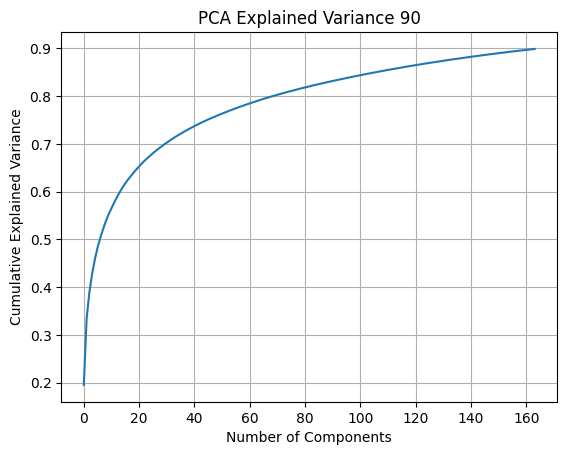

In [53]:
X_pca_90 = pca_90.fit_transform(X)

# Plot cumulative variance
plt.plot(pca_90.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance 90')
plt.grid(True)
plt.show()

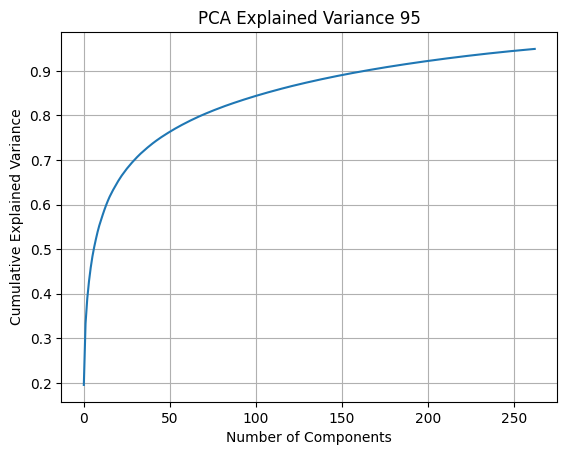

In [54]:
X_pca_95 = pca_95.fit_transform(X)

# Plot cumulative variance
plt.plot(pca_95.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance 95')
plt.grid(True)
plt.show()

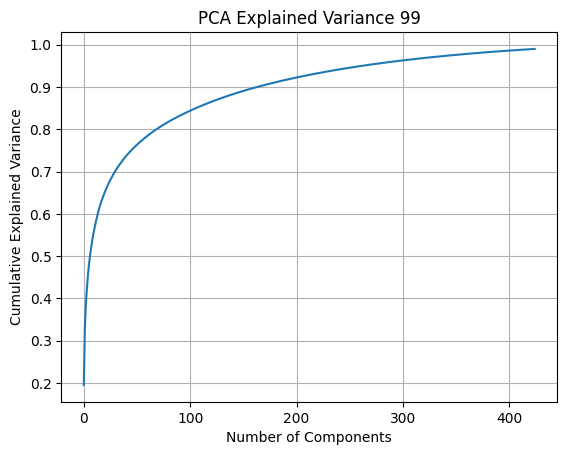

In [55]:
X_pca_99 = pca_99.fit_transform(X)

# Plot cumulative variance
plt.plot(pca_99.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance 99')
plt.grid(True)
plt.show()

In [56]:
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}


In [57]:
X_train_99, X_test_99, y_train_99, y_test_99 = train_test_split(X_pca_99, y, test_size=0.3, random_state=42)
for name, classifier in classifier_5.items():
    classifier.fit( X_train_99.astype(float), y_train_99.astype(float) )
    y_pred_99 = classifier.predict(X_test_99)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_99, y_pred_99)
    accuracy_scores[name] = accuracy

    # Calculate precision (macro-average)
    precision = precision_score(y_test_99, y_pred_99, average='macro')
    precision_scores[name] = precision

    # Calculate recall (macro-average)
    recall = recall_score(y_test_99, y_pred_99, average='macro')
    recall_scores[name] = recall

    # Calculate F1-score (macro-average)
    f1 = f1_score(y_test_99, y_pred_99, average='macro')
    f1_scores[name] = f1

    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (Macro): {precision:.2f}')
    print(f'Recall (Macro): {recall:.2f}')
    print(f'F1-Score (Macro): {f1:.2f}')
    print('-' * 30)


MLP Neural Network Metrics:
Accuracy: 0.71
Precision (Macro): 0.72
Recall (Macro): 0.71
F1-Score (Macro): 0.71
------------------------------
Voting Classifier Metrics:
Accuracy: 0.76
Precision (Macro): 0.77
Recall (Macro): 0.75
F1-Score (Macro): 0.75
------------------------------
Stacking Classifier Metrics:
Accuracy: 0.74
Precision (Macro): 0.75
Recall (Macro): 0.74
F1-Score (Macro): 0.74
------------------------------


In [ ]:
X_train_99, X_test_99, y_train_99, y_test_99 = train_test_split(X_pca_99, y, test_size=0.2, random_state=42)

for name, classifier in classifier_5.items():
    classifier.fit( X_train_99.astype(float), y_train_99.astype(float) )
    y_pred_99 = classifier.predict(X_test_99)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_99, y_pred_99)
    accuracy_scores[name] = accuracy

    # Calculate precision (macro-average)
    precision = precision_score(y_test_99, y_pred_99, average='macro')
    precision_scores[name] = precision

    # Calculate recall (macro-average)
    recall = recall_score(y_test_99, y_pred_99, average='macro')
    recall_scores[name] = recall

    # Calculate F1-score (macro-average)
    f1 = f1_score(y_test_99, y_pred_99, average='macro')
    f1_scores[name] = f1

    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (Macro): {precision:.2f}')
    print(f'Recall (Macro): {recall:.2f}')
    print(f'F1-Score (Macro): {f1:.2f}')
    print('-' * 30)

MLP Neural Network Metrics:
Accuracy: 0.72
Precision (Macro): 0.73
Recall (Macro): 0.72
F1-Score (Macro): 0.72
------------------------------
Voting Classifier Metrics:
Accuracy: 0.77
Precision (Macro): 0.78
Recall (Macro): 0.77
F1-Score (Macro): 0.77
------------------------------
Stacking Classifier Metrics:
Accuracy: 0.76
Precision (Macro): 0.76
Recall (Macro): 0.76
F1-Score (Macro): 0.75
------------------------------


In [ ]:
X_train_95, X_test_95, y_train_95, y_test_95 = train_test_split(X_pca_95, y, test_size=0.3, random_state=42)
for name, classifier in classifier_5.items():
    classifier.fit( X_train_95.astype(float), y_train_95.astype(float) )
    y_pred_95 = classifier.predict(X_test_95)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_95, y_pred_95)
    accuracy_scores[name] = accuracy

    # Calculate precision (macro-average)
    precision = precision_score(y_test_95, y_pred_95, average='macro')
    precision_scores[name] = precision

    # Calculate recall (macro-average)
    recall = recall_score(y_test_95, y_pred_95, average='macro')
    recall_scores[name] = recall

    # Calculate F1-score (macro-average)
    f1 = f1_score(y_test_95, y_pred_95, average='macro')
    f1_scores[name] = f1

    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (Macro): {precision:.2f}')
    print(f'Recall (Macro): {recall:.2f}')
    print(f'F1-Score (Macro): {f1:.2f}')
    print('-' * 30)


MLP Neural Network Metrics:
Accuracy: 0.72
Precision (Macro): 0.73
Recall (Macro): 0.72
F1-Score (Macro): 0.72
------------------------------
Voting Classifier Metrics:
Accuracy: 0.75
Precision (Macro): 0.76
Recall (Macro): 0.75
F1-Score (Macro): 0.75
------------------------------
Stacking Classifier Metrics:
Accuracy: 0.73
Precision (Macro): 0.74
Recall (Macro): 0.73
F1-Score (Macro): 0.73
------------------------------


In [ ]:
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X_pca_90, y, test_size=0.3, random_state=42)
for name, classifier in classifier_5.items():
    classifier.fit( X_train_90.astype(float), y_train_90.astype(float) )
    y_pred_90 = classifier.predict(X_test_90)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_90, y_pred_90)
    accuracy_scores[name] = accuracy

    # Calculate precision (macro-average)
    precision = precision_score(y_test_90, y_pred_90, average='macro')
    precision_scores[name] = precision

    # Calculate recall (macro-average)
    recall = recall_score(y_test_90, y_pred_90, average='macro')
    recall_scores[name] = recall

    # Calculate F1-score (macro-average)
    f1 = f1_score(y_test_90, y_pred_90, average='macro')
    f1_scores[name] = f1

    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (Macro): {precision:.2f}')
    print(f'Recall (Macro): {recall:.2f}')
    print(f'F1-Score (Macro): {f1:.2f}')
    print('-' * 30)


MLP Neural Network Metrics:
Accuracy: 0.70
Precision (Macro): 0.70
Recall (Macro): 0.70
F1-Score (Macro): 0.69
------------------------------
Voting Classifier Metrics:
Accuracy: 0.71
Precision (Macro): 0.71
Recall (Macro): 0.70
F1-Score (Macro): 0.70
------------------------------
Stacking Classifier Metrics:
Accuracy: 0.71
Precision (Macro): 0.71
Recall (Macro): 0.71
F1-Score (Macro): 0.71
------------------------------


In [59]:
classifier_6 = {
    'Neural Network': MLPClassifier(max_iter=1000),
    'SGD Classifier': SGDClassifier(class_weight='balanced'),
    'Linear SVC': LinearSVC(class_weight='balanced'),
    'NuSVC': NuSVC(class_weight='balanced'),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
    'Support Vector Machine Balanced': SVC(class_weight='balanced'),
    'Logistic Regression Balanced': LogisticRegression(class_weight='balanced'),
    'Ridge Classifier': RidgeClassifier(class_weight='balanced'),
    'Stochastic Gradient Descent': SGDClassifier(class_weight='balanced'),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'LDA': LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.2),
    'Ridge Classifier': RidgeClassifier(),
    'Logistic Regression': LogisticRegression()
    }

In [60]:
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X_pca_90, y, test_size=0.3, random_state=42)
for name, classifier in classifier_6.items():
    classifier.fit( X_train_90.astype(float), y_train_90.astype(float) )
    y_pred_90 = classifier.predict(X_test_90)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_90, y_pred_90)
    accuracy_scores[name] = accuracy

    # Calculate precision (macro-average)
    precision = precision_score(y_test_90, y_pred_90, average='macro')
    precision_scores[name] = precision

    # Calculate recall (macro-average)
    recall = recall_score(y_test_90, y_pred_90, average='macro')
    recall_scores[name] = recall

    # Calculate F1-score (macro-average)
    f1 = f1_score(y_test_90, y_pred_90, average='macro')
    f1_scores[name] = f1

    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (Macro): {precision:.2f}')
    print(f'Recall (Macro): {recall:.2f}')
    print(f'F1-Score (Macro): {f1:.2f}')
    print('-' * 30)


Neural Network Metrics:
Accuracy: 0.71
Precision (Macro): 0.70
Recall (Macro): 0.70
F1-Score (Macro): 0.70
------------------------------
SGD Classifier Metrics:
Accuracy: 0.68
Precision (Macro): 0.68
Recall (Macro): 0.67
F1-Score (Macro): 0.67
------------------------------
Linear SVC Metrics:
Accuracy: 0.71
Precision (Macro): 0.71
Recall (Macro): 0.70
F1-Score (Macro): 0.70
------------------------------
NuSVC Metrics:
Accuracy: 0.62
Precision (Macro): 0.64
Recall (Macro): 0.61
F1-Score (Macro): 0.61
------------------------------
Linear Discriminant Analysis Metrics:
Accuracy: 0.67
Precision (Macro): 0.68
Recall (Macro): 0.66
F1-Score (Macro): 0.66
------------------------------
Support Vector Machine Metrics:
Accuracy: 0.59
Precision (Macro): 0.60
Recall (Macro): 0.58
F1-Score (Macro): 0.58
------------------------------
Logistic Regression Metrics:
Accuracy: 0.71
Precision (Macro): 0.71
Recall (Macro): 0.70
F1-Score (Macro): 0.70
------------------------------
Multi-layer Perceptr

In [61]:
X_train_95, X_test_95, y_train_95, y_test_95 = train_test_split(X_pca_95, y, test_size=0.3, random_state=42)
for name, classifier in classifier_6.items():
    classifier.fit( X_train_95.astype(float), y_train_95.astype(float) )
    y_pred_95 = classifier.predict(X_test_95)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_95, y_pred_95)
    accuracy_scores[name] = accuracy

    # Calculate precision (macro-average)
    precision = precision_score(y_test_95, y_pred_95, average='macro')
    precision_scores[name] = precision

    # Calculate recall (macro-average)
    recall = recall_score(y_test_95, y_pred_95, average='macro')
    recall_scores[name] = recall

    # Calculate F1-score (macro-average)
    f1 = f1_score(y_test_95, y_pred_95, average='macro')
    f1_scores[name] = f1

    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (Macro): {precision:.2f}')
    print(f'Recall (Macro): {recall:.2f}')
    print(f'F1-Score (Macro): {f1:.2f}')
    print('-' * 30)


Neural Network Metrics:
Accuracy: 0.77
Precision (Macro): 0.77
Recall (Macro): 0.76
F1-Score (Macro): 0.76
------------------------------
SGD Classifier Metrics:
Accuracy: 0.72
Precision (Macro): 0.73
Recall (Macro): 0.71
F1-Score (Macro): 0.71
------------------------------
Linear SVC Metrics:
Accuracy: 0.75
Precision (Macro): 0.75
Recall (Macro): 0.74
F1-Score (Macro): 0.74
------------------------------
NuSVC Metrics:
Accuracy: 0.65
Precision (Macro): 0.67
Recall (Macro): 0.64
F1-Score (Macro): 0.64
------------------------------
Linear Discriminant Analysis Metrics:
Accuracy: 0.72
Precision (Macro): 0.73
Recall (Macro): 0.72
F1-Score (Macro): 0.72
------------------------------
Support Vector Machine Metrics:
Accuracy: 0.62
Precision (Macro): 0.63
Recall (Macro): 0.61
F1-Score (Macro): 0.61
------------------------------
Logistic Regression Metrics:
Accuracy: 0.75
Precision (Macro): 0.75
Recall (Macro): 0.74
F1-Score (Macro): 0.74
------------------------------
Multi-layer Perceptr

In [ ]:
X_train_99, X_test_99, y_train_99, y_test_99 = train_test_split(X_pca_99, y, test_size=0.3, random_state=42)
for name, classifier in classifier_6.items():
    classifier.fit( X_train_99.astype(float), y_train_99.astype(float) )
    y_pred_99 = classifier.predict(X_test_99)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_99, y_pred_99)
    accuracy_scores[name] = accuracy

    # Calculate precision (macro-average)
    precision = precision_score(y_test_99, y_pred_99, average='macro')
    precision_scores[name] = precision

    # Calculate recall (macro-average)
    recall = recall_score(y_test_99, y_pred_99, average='macro')
    recall_scores[name] = recall

    # Calculate F1-score (macro-average)
    f1 = f1_score(y_test_99, y_pred_99, average='macro')
    f1_scores[name] = f1

    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (Macro): {precision:.2f}')
    print(f'Recall (Macro): {recall:.2f}')
    print(f'F1-Score (Macro): {f1:.2f}')
    print('-' * 30)


Neural Network Metrics:
Accuracy: 0.78
Precision (Macro): 0.78
Recall (Macro): 0.77
F1-Score (Macro): 0.77
------------------------------
SGD Classifier Metrics:
Accuracy: 0.75
Precision (Macro): 0.75
Recall (Macro): 0.74
F1-Score (Macro): 0.74
------------------------------
Linear SVC Metrics:
Accuracy: 0.77
Precision (Macro): 0.77
Recall (Macro): 0.77
F1-Score (Macro): 0.77
------------------------------
NuSVC Metrics:
Accuracy: 0.65
Precision (Macro): 0.67
Recall (Macro): 0.64
F1-Score (Macro): 0.65
------------------------------
Linear Discriminant Analysis Metrics:
Accuracy: 0.76
Precision (Macro): 0.77
Recall (Macro): 0.75
F1-Score (Macro): 0.75
------------------------------
Support Vector Machine Metrics:
Accuracy: 0.63
Precision (Macro): 0.64
Recall (Macro): 0.62
F1-Score (Macro): 0.62
------------------------------
Logistic Regression Metrics:
Accuracy: 0.76
Precision (Macro): 0.75
Recall (Macro): 0.75
F1-Score (Macro): 0.75
------------------------------
Multi-layer Perceptr

In [62]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train6, y_train6)
print("Dummy accuracy:", dummy.score(X_test6, y_test6))

Dummy accuracy: 0.07804878048780488


In [63]:
Patterns = data_6["Pattern"].unique()

In [64]:
Patterns

array(['AbstractFactory', 'Adapter', 'Bridge', 'Builder',
       'Chain_of_Responsibility', 'Command', 'Composite', 'Decorator',
       'Facade', 'FactoryMethod', 'Flyweight', 'Interpreter', 'Iterator',
       'Mediator', 'Memento', 'NonGofPatterns', 'Observer', 'Prototype',
       'Proxy', 'Singleton', 'State', 'Strategy', 'Template_Method',
       'Visitor'], dtype=object)

In [65]:
colormaps = ['Blues', 'Oranges', 'Greens', 'Reds', 'Purples', 'YlOrBr']
# Create subplots for confusion matrices

class_labels = ['AbstractFactory', 'Adapter', 'Bridge', 'Builder',
       'Chain_of_Responsibility', 'Command', 'Composite', 'Decorator',
       'Facade', 'FactoryMethod', 'Flyweight', 'Interpreter', 'Iterator',
       'Mediator', 'Memento', 'NonGofPatterns', 'Observer', 'Prototype',
       'Proxy', 'Singleton', 'State', 'Strategy', 'Template_Method',
       'Visitor']

In [66]:
X_train_99, X_test_99, y_train_99, y_test_99 = train_test_split(X_pca_99, y, test_size=0.3, random_state=42)
classifier = MLPClassifier(max_iter=1000)
classifier.fit( X_train_99.astype(float), y_train_99.astype(float) )
y_pred_99 = classifier.predict(X_test_99)





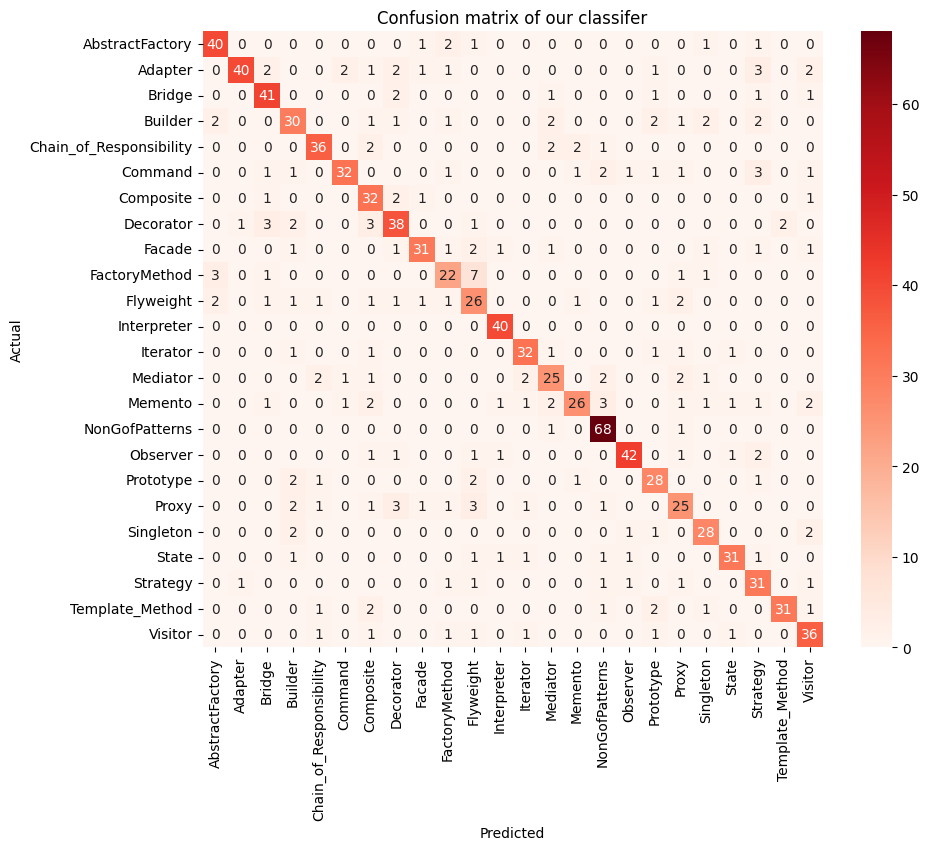

In [67]:
from sklearn.metrics import confusion_matrix

y_test_str = [class_labels[int(i)] for i in y_test_99]
y_pred_str = [class_labels[int(i)] for i in y_pred_99]

# Calculate the confusion matrix using the string labels
cm = confusion_matrix(y_test_str, y_pred_str, labels=class_labels)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion matrix of our classifer')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [69]:
report = classification_report(y_test_99, y_pred_99, target_names=['AbstractFactory', 'Adapter', 'Bridge', 'Builder',
       'Chain_of_Responsibility', 'Command', 'Composite', 'Decorator',
       'Facade', 'FactoryMethod', 'Flyweight', 'Interpreter', 'Iterator',
       'Mediator', 'Memento', 'NonGofPatterns', 'Observer', 'Prototype',
       'Proxy', 'Singleton', 'State', 'Strategy', 'Template_Method',
       'Visitor'])
print(f' Classification Report:\n{report}')
print('-' * 30)

 Classification Report:
                         precision    recall  f1-score   support

        AbstractFactory       0.85      0.87      0.86        46
                Adapter       0.95      0.73      0.82        55
                 Bridge       0.80      0.87      0.84        47
                Builder       0.70      0.68      0.69        44
Chain_of_Responsibility       0.84      0.84      0.84        43
                Command       0.89      0.71      0.79        45
              Composite       0.65      0.86      0.74        37
              Decorator       0.75      0.76      0.75        50
                 Facade       0.86      0.76      0.81        41
          FactoryMethod       0.69      0.63      0.66        35
              Flyweight       0.57      0.67      0.61        39
            Interpreter       0.91      1.00      0.95        40
               Iterator       0.84      0.84      0.84        38
               Mediator       0.71      0.69      0.70        36


In [70]:
from sklearn.preprocessing import LabelEncoder

gof_category_map = {
    'AbstractFactory': 'Creational',
    'Builder': 'Creational',
    'FactoryMethod': 'Creational',
    'Prototype': 'Creational',
    'Singleton': 'Creational',

    'Adapter': 'Structural',
    'Bridge': 'Structural',
    'Composite': 'Structural',
    'Decorator': 'Structural',
    'Facade': 'Structural',
    'Flyweight': 'Structural',
    'Proxy': 'Structural',

    'Chain_of_Responsibility': 'Behavioral',
    'Command': 'Behavioral',
    'Interpreter': 'Behavioral',
    'Iterator': 'Behavioral',
    'Mediator': 'Behavioral',
    'Memento': 'Behavioral',
    'Observer': 'Behavioral',
    'State': 'Behavioral',
    'Strategy': 'Behavioral',
    'Template_Method': 'Behavioral',
    'Visitor': 'Behavioral',

    'NonGofPatterns': 'Other'
}

# Step 2: Map original 'Pattern' column to GoF categories
data_6['GoF_Category'] = data_6['Pattern'].map(gof_category_map)

# Step 3: Encode the new coarse-grained labels
label_encoder = LabelEncoder()
data_6['gof_category_encoded'] = label_encoder.fit_transform(data_6['GoF_Category'])

# Optional: check the mapping
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(category_mapping)


{'Behavioral': np.int64(0), 'Creational': np.int64(1), 'Other': np.int64(2), 'Structural': np.int64(3)}


In [71]:
data_6['gof_category_encoded'].value_counts()

,count
gof_category_encoded,
0,1496
3,972
1,681
2,265


In [85]:
data_6['GoF_Category'].value_counts()

,count
GoF_Category,
Behavioral,1496
Structural,972
Creational,681
Other,265


In [72]:
y = data_6['pattern_encoded']
X = data_6.drop(['Pattern', 'Path','File', 'pattern_encoded','GoF_Category'], axis=1)  # Featuresfrom sklearn.model_selection import train_test_split
# Initialize StratifiedShuffleSplit with a 30% test size
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Perform the stratified split
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index].astype(float)
    y_train, y_test = y.iloc[train_index], y.iloc[test_index].astype(float)

In [73]:
y = data_6['pattern_encoded']
X = data_6.drop(['Pattern', 'Path','File', 'pattern_encoded','GoF_Category'], axis=1)  # Featuresfrom sklearn.model_selection import train_test_split
# Initialize StratifiedShuffleSplit with a 30% test size
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Perform the stratified split
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index].astype(float)
    y_train, y_test = y.iloc[train_index], y.iloc[test_index].astype(float)

In [74]:
classifiers = {
    'Support Vector Machine': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Ridge Classifier': RidgeClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'SGD Classifier': SGDClassifier(),
    'Linear SVC': LinearSVC(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Gaussian Process': GaussianProcessClassifier()}

# Initialize dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
  # make sure labels match

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit( X_train.astype(float), y_train.astype(float) )
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

    # Calculate precision (macro-average)
    precision = precision_score(y_test, y_pred, average='macro')
    precision_scores[name] = precision

    # Calculate recall (macro-average)
    recall = recall_score(y_test, y_pred, average='macro')
    recall_scores[name] = recall

    # Calculate F1-score (macro-average)
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores[name] = f1

    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (Macro): {precision:.2f}')
    print(f'Recall (Macro): {recall:.2f}')
    print(f'F1-Score (Macro): {f1:.2f}')
    print('-' * 30)
print("done!")

Support Vector Machine Metrics:
Accuracy: 0.61
Precision (Macro): 0.62
Recall (Macro): 0.59
F1-Score (Macro): 0.60
------------------------------
Gaussian Naive Bayes Metrics:
Accuracy: 0.46
Precision (Macro): 0.50
Recall (Macro): 0.44
F1-Score (Macro): 0.44
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.81
Precision (Macro): 0.81
Recall (Macro): 0.80
F1-Score (Macro): 0.80
------------------------------
Ridge Classifier Metrics:
Accuracy: 0.77
Precision (Macro): 0.78
Recall (Macro): 0.76
F1-Score (Macro): 0.77
------------------------------
HistGradientBoosting Metrics:
Accuracy: 0.70
Precision (Macro): 0.69
Recall (Macro): 0.69
F1-Score (Macro): 0.69
------------------------------
RandomForestClassifier Metrics:
Accuracy: 0.57
Precision (Macro): 0.58
Recall (Macro): 0.56
F1-Score (Macro): 0.56
------------------------------
K-Nearest Neighbors Metrics:
Accuracy: 0.59
Precision (Macro): 0.59
Recall (Macro): 0.57
F1-Score (Macro): 0.57
------------------------------
Neural Network Metrics:
Accuracy: 0.82
Precision (Macro): 0.82
Recall (Macro): 0.82
F1-Score (Macro): 0.81
------------------------------
SGD Classifier Metrics:
Accuracy: 0.74
Precision (Macro): 0.79
Recall (Macro): 0.75
F1-Score (Macro): 0.75
------------------------------
Linear S

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

Quadratic Discriminant Analysis Metrics:
Accuracy: 0.08
Precision (Macro): 0.11
Recall (Macro): 0.08
F1-Score (Macro): 0.08
------------------------------
Gaussian Process Metrics:
Accuracy: 0.67
Precision (Macro): 0.67
Recall (Macro): 0.66
F1-Score (Macro): 0.65
------------------------------
done!


In [75]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [76]:
Best_classifiers = {
    'Neural Network': MLPClassifier(max_iter=1000),
    'SGD Classifier': SGDClassifier(class_weight='balanced'),
    'Linear SVC': LinearSVC(class_weight='balanced'),
    'NuSVC': NuSVC(class_weight='balanced'),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
    'Support Vector Machine Balanced': SVC(class_weight='balanced'),
    'Logistic Regression Balanced': LogisticRegression(class_weight='balanced'),
    'Ridge Classifier': RidgeClassifier(class_weight='balanced'),
    'Stochastic Gradient Descent': SGDClassifier(class_weight='balanced'),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'LDA': LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.2),
    'Ridge Classifier': RidgeClassifier(),
    'Logistic Regression': LogisticRegression(),
     'MLP Neural Network': make_pipeline(
        StandardScaler(),
        MLPClassifier(max_iter=500, random_state=42)
    ),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=500, random_state=42))),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', make_pipeline(StandardScaler(), SVC(probability=True, random_state=42)))
    ], voting='soft'),
    'Stacking Classifier': StackingClassifier(estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', make_pipeline(StandardScaler(), SVC(probability=True, random_state=42)))
    ], final_estimator=make_pipeline(StandardScaler(), LogisticRegression(max_iter=500, random_state=42)))
}




In [84]:
X_train

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_503,Feature_504,Feature_505,Feature_506,Feature_507,Feature_508,Feature_509,Feature_510,Feature_511,gof_category_encoded
3305,-0.070104,-0.238800,-0.191328,0.267494,-0.154971,0.072377,0.125952,0.039940,-0.206248,-0.178989,...,0.040731,-0.723283,0.006991,-0.204562,0.300572,-0.274952,0.054843,-0.163811,-0.325189,0
1367,-0.123890,0.235397,-0.148395,0.302169,0.172171,0.102837,-0.033640,-0.038396,-0.263965,-0.167862,...,0.054268,-0.141368,0.006043,-0.129144,0.200432,0.280457,0.045330,0.137270,-0.327563,1
2619,-0.239842,0.151554,-0.117134,0.258461,0.004578,-0.033398,0.077321,0.035216,-0.075959,-0.164158,...,0.158589,-0.336030,0.087518,-0.050105,0.374587,0.087356,0.061271,-0.187983,-0.190233,1
1203,-0.610336,-0.251740,-0.296067,0.141355,-0.507515,-0.030061,0.166351,-0.073554,-0.403355,0.036526,...,-0.150994,-0.513712,-0.059748,-0.461300,-0.261759,-0.242023,0.207294,0.376804,-0.311238,3
122,-0.164750,0.367062,0.201037,0.293149,-0.034140,0.039636,-0.085271,-0.034173,-0.190028,0.049144,...,0.014933,-0.207426,-0.192578,-0.234816,0.126284,-0.031275,0.262134,-0.078465,-0.231651,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,-0.081880,0.502574,0.175656,0.194724,0.136759,-0.167149,0.057565,-0.130702,-0.251446,0.214252,...,0.011336,-0.277483,-0.082247,-0.259370,-0.049390,0.009293,0.357431,0.206487,-0.215926,3
1547,-0.151937,-0.414534,-0.170034,0.493605,-0.000257,0.055238,-0.323456,0.329236,-0.212432,-0.076447,...,-0.100317,-0.147676,-0.081526,-0.330590,0.128685,0.228514,0.145719,-0.434326,-0.764485,3
2801,-0.277655,-0.621140,-0.025674,0.457841,0.144731,0.035622,0.178652,0.186504,-0.084589,-0.166721,...,-0.174089,-0.421193,-0.126038,-0.130016,-0.114166,0.395605,-0.136861,-0.716705,-0.401208,1
3067,-0.202779,-0.006048,0.059154,0.240411,0.099383,0.038693,0.066329,0.014359,-0.068911,-0.349153,...,-0.102368,-0.361436,0.056166,-0.160740,0.029037,0.022315,0.051259,0.081439,-0.247156,0


In [77]:
# Initialize dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
  # make sure labels match

# Train and evaluate each classifier
for name, classifier in Best_classifiers.items():
    classifier.fit( X_train.astype(float), y_train.astype(float) )
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

    # Calculate precision (macro-average)
    precision = precision_score(y_test, y_pred, average='macro')
    precision_scores[name] = precision

    # Calculate recall (macro-average)
    recall = recall_score(y_test, y_pred, average='macro')
    recall_scores[name] = recall

    # Calculate F1-score (macro-average)
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores[name] = f1

    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (Macro): {precision:.2f}')
    print(f'Recall (Macro): {recall:.2f}')
    print(f'F1-Score (Macro): {f1:.2f}')
    print('-' * 30)
print("done!")

Neural Network Metrics:
Accuracy: 0.83
Precision (Macro): 0.82
Recall (Macro): 0.82
F1-Score (Macro): 0.82
------------------------------
SGD Classifier Metrics:
Accuracy: 0.78
Precision (Macro): 0.79
Recall (Macro): 0.77
F1-Score (Macro): 0.77
------------------------------
Linear SVC Metrics:
Accuracy: 0.81
Precision (Macro): 0.81
Recall (Macro): 0.81
F1-Score (Macro): 0.81
------------------------------
NuSVC Metrics:
Accuracy: 0.75
Precision (Macro): 0.75
Recall (Macro): 0.74
F1-Score (Macro): 0.74
------------------------------
Linear Discriminant Analysis Metrics:
Accuracy: 0.75
Precision (Macro): 0.76
Recall (Macro): 0.75
F1-Score (Macro): 0.75
------------------------------
Support Vector Machine Metrics:
Accuracy: 0.61
Precision (Macro): 0.62
Recall (Macro): 0.59
F1-Score (Macro): 0.60
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.81
Precision (Macro): 0.81
Recall (Macro): 0.80
F1-Score (Macro): 0.80
------------------------------
Multi-layer Perceptron Metrics:
Accuracy: 0.83
Precision (Macro): 0.83
Recall (Macro): 0.82
F1-Score (Macro): 0.82
------------------------------
Support Vector Machine Balanced Metrics:
Accuracy: 0.62
Precision (Macro): 0.62
Recall (Macro): 0.61
F1-Score (Macro): 0.61
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Balanced Metrics:
Accuracy: 0.81
Precision (Macro): 0.80
Recall (Macro): 0.80
F1-Score (Macro): 0.80
------------------------------
Ridge Classifier Metrics:
Accuracy: 0.77
Precision (Macro): 0.78
Recall (Macro): 0.76
F1-Score (Macro): 0.77
------------------------------
Stochastic Gradient Descent Metrics:
Accuracy: 0.70
Precision (Macro): 0.78
Recall (Macro): 0.70
F1-Score (Macro): 0.71
------------------------------
Random Forest Metrics:
Accuracy: 0.61
Precision (Macro): 0.61
Recall (Macro): 0.59
F1-Score (Macro): 0.60
------------------------------
LDA Metrics:
Accuracy: 0.80
Precision (Macro): 0.80
Recall (Macro): 0.79
F1-Score (Macro): 0.79
------------------------------
MLP Neural Network Metrics:
Accuracy: 0.77
Precision (Macro): 0.77
Recall (Macro): 0.77
F1-Score (Macro): 0.77
------------------------------
Voting Classifier Metrics:
Accuracy: 0.79
Precision (Macro): 0.79
Recall (Macro): 0.78
F1-Score (Macro): 0.78
------------------------------
Stacking C

In [78]:
print("done")


done


In [79]:
classifier =  MLPClassifier(max_iter=1000)

In [80]:
classifier.fit( X_train.astype(float), y_train.astype(float) )
y_pred = classifier.predict(X_test)

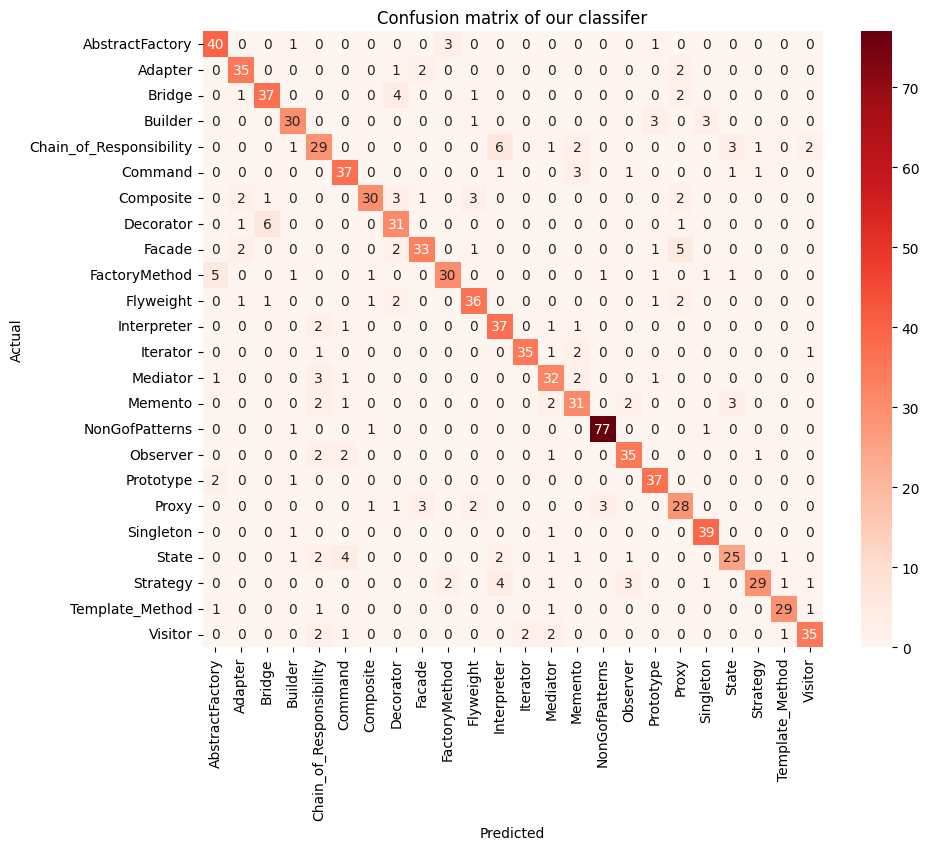

In [81]:
from sklearn.metrics import confusion_matrix

y_test_str = [class_labels[int(i)] for i in y_test]
y_pred_str = [class_labels[int(i)] for i in y_pred]

# Calculate the confusion matrix using the string labels
cm = confusion_matrix(y_test_str, y_pred_str, labels=class_labels)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion matrix of our classifer')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


In [82]:
report = classification_report(y_test, y_pred, target_names=['AbstractFactory', 'Adapter', 'Bridge', 'Builder',
       'Chain_of_Responsibility', 'Command', 'Composite', 'Decorator',
       'Facade', 'FactoryMethod', 'Flyweight', 'Interpreter', 'Iterator',
       'Mediator', 'Memento', 'NonGofPatterns', 'Observer', 'Prototype',
       'Proxy', 'Singleton', 'State', 'Strategy', 'Template_Method',
       'Visitor'])
print(f' Classification Report:\n{report}')
print('-' * 30)

 Classification Report:
                         precision    recall  f1-score   support

        AbstractFactory       0.82      0.89      0.85        45
                Adapter       0.83      0.88      0.85        40
                 Bridge       0.82      0.82      0.82        45
                Builder       0.81      0.81      0.81        37
Chain_of_Responsibility       0.66      0.64      0.65        45
                Command       0.79      0.84      0.81        44
              Composite       0.88      0.71      0.79        42
              Decorator       0.70      0.79      0.75        39
                 Facade       0.85      0.75      0.80        44
          FactoryMethod       0.86      0.73      0.79        41
              Flyweight       0.82      0.82      0.82        44
            Interpreter       0.74      0.88      0.80        42
               Iterator       0.95      0.88      0.91        40
               Mediator       0.73      0.80      0.76        40


In [ ]:
X_train_99, X_test_99, y_train_99, y_test_99 = train_test_split(X_pca_99, y, test_size=0.3, random_state=42)
classifier = MLPClassifier(max_iter=1000)
classifier.fit( X_train_99.astype(float), y_train_99.astype(float) )
y_pred_99 = classifier.predict(X_test_99)


what is the Category that get effected most :

In [90]:
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

print(f'\n{name} Metrics by GoF Category:')
for cat_id in category_ids:
    cat_name = label_names[cat_id]
    pattern_labels = category_to_patterns[cat_id]

    indices = [i for i, y in enumerate(y_test_np) if int(y) in pattern_labels]
    if not indices:
        continue

    y_true_cat = y_test_np[indices]
    y_pred_cat = y_pred_np[indices]

    acc = accuracy_score(y_true_cat, y_pred_cat)
    prec = precision_score(y_true_cat, y_pred_cat, average='macro', zero_division=0)
    rec = recall_score(y_true_cat, y_pred_cat, average='macro', zero_division=0)
    f1 = f1_score(y_true_cat, y_pred_cat, average='macro', zero_division=0)

    print(f'[{cat_name}] Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1: {f1:.2f}')



Neural Network Metrics by GoF Category:
[Behavioural] Accuracy: 0.78, Precision: 0.29, Recall: 0.24, F1: 0.26
[Creational] Accuracy: 0.81, Precision: 0.28, Recall: 0.23, F1: 0.25
[Other] Accuracy: 0.80, Precision: 0.23, Recall: 0.19, F1: 0.21
[Structural] Accuracy: 0.81, Precision: 0.29, Recall: 0.24, F1: 0.26


In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define GoF categories
label_names = ['Behavioural', 'Creational', 'Other', 'Structural']
category_ids = [0, 1, 2, 3]

# Map each design pattern label (0–23) to its GoF category
pattern_to_category = {
    0: 0, 1: 0, 2: 0, 3: 0,     # Behavioural
    4: 1, 5: 1, 6: 1, 7: 1,     # Creational
    8: 2, 9: 2,                 # Other
    10: 3, 11: 3, 12: 3, 13: 3, # Structural
    14: 0, 15: 1, 16: 1, 17: 2,
    18: 0, 19: 3, 20: 3, 21: 0,
    22: 2, 23: 1
}

# Invert mapping: GoF category → list of pattern labels
category_to_patterns = {cat: [] for cat in category_ids}
for pattern_label, cat in pattern_to_category.items():
    category_to_patterns[cat].append(pattern_label)

# Train and evaluate each classifier
for name, classifier in Best_classifiers.items():
    classifier.fit(X_train_99.astype(float), y_train_99.astype(float))
    y_pred_99 = classifier.predict(X_test_99)

    y_test_np_99 = np.array(y_test_99)
    y_pred_np_99 = np.array(y_pred_99)

    print(f'\n{name} Metrics by GoF Category:')
    print('-' * 40)

    for cat_id in category_ids:
        cat_name = label_names[cat_id]
        pattern_labels = category_to_patterns[cat_id]

        # Select indices where the true label belongs to the current category
        indices = [i for i, y in enumerate(y_test_np_99) if int(y) in pattern_labels]
        if not indices:
            print(f"[{cat_name}] No samples found.")
            continue

        y_true_cat = y_test_np_99[indices]
        y_pred_cat = y_pred_np_99[indices]

        acc = accuracy_score(y_true_cat, y_pred_cat)
        prec = precision_score(y_true_cat, y_pred_cat, average='macro', zero_division=0)
        rec = recall_score(y_true_cat, y_pred_cat, average='macro', zero_division=0)
        f1 = f1_score(y_true_cat, y_pred_cat, average='macro', zero_division=0)

        print(f"[{cat_name}] Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1: {f1:.2f}")
    print('=' * 40)



Neural Network Metrics by GoF Category:
----------------------------------------
[Behavioural] Accuracy: 0.75, Precision: 0.28, Recall: 0.23, F1: 0.25
[Creational] Accuracy: 0.82, Precision: 0.28, Recall: 0.24, F1: 0.26
[Other] Accuracy: 0.75, Precision: 0.22, Recall: 0.17, F1: 0.19
[Structural] Accuracy: 0.77, Precision: 0.25, Recall: 0.21, F1: 0.23

SGD Classifier Metrics by GoF Category:
----------------------------------------
[Behavioural] Accuracy: 0.67, Precision: 0.27, Recall: 0.20, F1: 0.23
[Creational] Accuracy: 0.78, Precision: 0.30, Recall: 0.24, F1: 0.27
[Other] Accuracy: 0.79, Precision: 0.27, Recall: 0.22, F1: 0.24
[Structural] Accuracy: 0.76, Precision: 0.26, Recall: 0.21, F1: 0.23

Linear SVC Metrics by GoF Category:
----------------------------------------
[Behavioural] Accuracy: 0.71, Precision: 0.28, Recall: 0.22, F1: 0.24
[Creational] Accuracy: 0.81, Precision: 0.30, Recall: 0.25, F1: 0.27
[Other] Accuracy: 0.75, Precision: 0.21, Recall: 0.17, F1: 0.19
[Structural

In [95]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define GoF category names and IDs
label_names = ['Behavioural', 'Creational', 'Other', 'Structural']
category_ids = [0, 1, 2, 3]

# Mapping from pattern label to GoF category ID
pattern_to_category = {
    0: 0, 1: 0, 2: 0, 3: 0,
    4: 1, 5: 1, 6: 1, 7: 1,
    8: 3, 9: 3,
    10: 3, 11: 3, 12: 3, 13: 3,
    14: 0, 15: 2, 16: 0, 17: 1,
    18: 0, 19: 3, 20:0, 21: 0,
    22: 1, 23: 0
}

# Invert mapping: GoF category → list of pattern labels
category_to_patterns = {cat: [] for cat in category_ids}
for pattern_label, cat in pattern_to_category.items():
    category_to_patterns[cat].append(pattern_label)

# Initialize list to collect rows for CSV
results = []

# Train and evaluate each classifier
for name, classifier in Best_classifiers.items():
    classifier.fit(X_train.astype(float), y_train.astype(float))
    y_pred = classifier.predict(X_test)

    y_test_np = np.array(y_test)
    y_pred_np = np.array(y_pred)

    for cat_id in category_ids:
        cat_name = label_names[cat_id]
        pattern_labels = category_to_patterns[cat_id]

        # Select only test samples that belong to the current category
        indices = [i for i, y in enumerate(y_test_np) if int(y) in pattern_labels]
        if not indices:
            continue

        y_true_cat = y_test_np[indices]
        y_pred_cat = y_pred_np[indices]

        acc = accuracy_score(y_true_cat, y_pred_cat)
        prec = precision_score(y_true_cat, y_pred_cat, average='macro', zero_division=0)
        rec = recall_score(y_true_cat, y_pred_cat, average='macro', zero_division=0)
        f1 = f1_score(y_true_cat, y_pred_cat, average='macro', zero_division=0)

        results.append({
            'Classifier': name,
            'Category': cat_name,
            'Accuracy': round(acc, 4),
            'Precision': round(prec, 4),
            'Recall': round(rec, 4),
            'F1-Score': round(f1, 4)
        })

# Convert to DataFrame and save
df_results = pd.DataFrame(results)
df_results.to_csv('per_category_metrics.csv', index=False)
print("CSV file 'per_category_metrics.csv' has been saved.")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

CSV file 'per_category_metrics.csv' has been saved.


In [94]:
Patterns

array(['AbstractFactory', 'Adapter', 'Bridge', 'Builder',
       'Chain_of_Responsibility', 'Command', 'Composite', 'Decorator',
       'Facade', 'FactoryMethod', 'Flyweight', 'Interpreter', 'Iterator',
       'Mediator', 'Memento', 'NonGofPatterns', 'Observer', 'Prototype',
       'Proxy', 'Singleton', 'State', 'Strategy', 'Template_Method',
       'Visitor'], dtype=object)

In [93]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize a list to store results
pattern_metrics = []

# Define class label names if known (e.g., from y)
# Example: label_names = ['Singleton', 'Factory', 'Observer', ..., 'Composite']
# If you don't know them, use label indices (0, 1, ..., N)
unique_labels = sorted(np.unique(y))
label_names = [f'Pattern_{i}' for i in unique_labels]

# Train and evaluate classifiers
for name, classifier in classifier_6.items():
    classifier.fit(X_train_99.astype(float), y_train_99.astype(float))
    y_pred_99 = classifier.predict(X_test_99)

    # Generate detailed classification report per class
    report = classification_report(
        y_test_99,
        y_pred_99,
        labels=unique_labels,
        target_names=label_names,
        output_dict=True,
        zero_division=0
    )

    for pattern in label_names:
        metrics = report[pattern]
        pattern_metrics.append({
            'Classifier': name,
            'Pattern': pattern,
            'Precision': round(metrics['precision'], 4),
            'Recall': round(metrics['recall'], 4),
            'F1-Score': round(metrics['f1-score'], 4),
            'Support': int(metrics['support'])
        })

# Convert to DataFrame and save to CSV
df_pattern_metrics = pd.DataFrame(pattern_metrics)
df_pattern_metrics.to_csv('per_pattern_metrics.csv', index=False)
print("Per-pattern metrics saved to 'per_pattern_metrics.csv'")


Per-pattern metrics saved to 'per_pattern_metrics.csv'


In [97]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define GoF categories
label_names = ['Behavioural', 'Creational', 'Other', 'Structural']
category_ids = [0, 1, 2, 3]

# Map each design pattern label (0–23) to its GoF category
pattern_to_category = {
    0: 0, 1: 0, 2: 0, 3: 0,     # Behavioural
    4: 1, 5: 1, 6: 1, 7: 1,     # Creational
    8: 2, 9: 2,                 # Other
    10: 3, 11: 3, 12: 3, 13: 3, # Structural
    14: 0, 15: 1, 16: 1, 17: 2,
    18: 0, 19: 3, 20: 3, 21: 0,
    22: 2, 23: 1
}

# Invert mapping: GoF category → list of pattern labels
category_to_patterns = {cat: [] for cat in category_ids}
for pattern_label, cat in pattern_to_category.items():
    category_to_patterns[cat].append(pattern_label)

results = []

# Train and evaluate each classifier
for name, classifier in Best_classifiers.items():
    classifier.fit(X_train_99.astype(float), y_train_99.astype(float))
    y_pred_99 = classifier.predict(X_test_99)

    y_test_np_99 = np.array(y_test_99)
    y_pred_np_99 = np.array(y_pred_99)

    for cat_id in category_ids:
        cat_name = label_names[cat_id]
        pattern_labels = category_to_patterns[cat_id]

        # Select indices where the true label belongs to the current category
        indices = [i for i, y in enumerate(y_test_np_99) if int(y) in pattern_labels]
        if not indices:
            # No samples in this category for this test set
            continue

        y_true_cat = y_test_np_99[indices]
        y_pred_cat = y_pred_np_99[indices]

        acc = accuracy_score(y_true_cat, y_pred_cat)
        prec = precision_score(y_true_cat, y_pred_cat, average='macro', zero_division=0)
        rec = recall_score(y_true_cat, y_pred_cat, average='macro', zero_division=0)
        f1 = f1_score(y_true_cat, y_pred_cat, average='macro', zero_division=0)

        # Append the results
        results.append({
            'Classifier': name,
            'Category_ID': cat_id,
            'Category_Name': cat_name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1_Score': f1
        })

# Convert results to DataFrame and save to CSV
df_results = pd.DataFrame(results)
df_results.to_csv('gof_category_metrics_0.csv', index=False)

print("Saved per-category classifier metrics to 'gof_category_metrics_0.csv'")


Saved per-category classifier metrics to 'gof_category_metrics_0.csv'
